In [1]:
TEST = False

Check which hyper-parameters are required by Region:

In [2]:
from pykeen.kge_models import Region
from datetime import datetime
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'normalization_of_entities',
 'strict_norm',
 'init_radius',
 'reg_lambda',
 'loss_type',
 'neg_factor',
 'region_type',
 'gradient_matrix']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [3]:
config = dict(
    metrics                     = [],
    training_set_path           = '../../../data/fb15k/train.tsv',
    test_set_path               = '../../../data/fb15k/valid_200.tsv',
    #neg_test_set_path           = '../../../data/fb15k/valid_neg.tsv',
    mapping_path                = '../../../data/fb15k/',
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    
    kg_embedding_model_name     = 'Region',
    region_type                 = 'full',
    embedding_dim               = 50,
    gradient_matrix             = False,
    
    init_radius                 = 1,
    reg_lambda                  = 0,
    loss_type                   = 'MRL',
    neg_factor                  = 1,
    corrupt_relations           = False,
 
    normalization_of_entities   = 2,  # corresponds to L2
    strict_norm                 = True,
    
    margin_loss                 = 0.5,
    learning_rate               = 0.001,
    es_metric                   = 'custom',
    num_epochs                  = 2000 if not TEST else 1000,  
    batch_size                  = 2**13,
    test_batch_size             = 2**16,
    filter_negative_triples     = False,
    preferred_device            = 'gpu'
)

In [4]:
time = datetime.now()
stamp = "{:04d}{:2d}{:2d}-{:2d}{:2d}".format(time.year, time.month, time.day, time.hour, time.minute)
stamp

'20191028-1547'

In [5]:
output_directory = '../../../models/FB15k_region_{}_dim{}_{}_rad{}_regL{}_lr{}_loss-{}_margin{}_negfactor{}_epochs{}_esmetric-{}_bs{}'.format(
    stamp,
    config['embedding_dim'], config['region_type'], config['init_radius'], 
    str(config['reg_lambda']).replace('.',''), 
    str(config['learning_rate']).replace('.',''),
    config['loss_type'],
    config['margin_loss'],
    config['neg_factor'],
    config['num_epochs'],
    config['es_metric'],
    config['batch_size']
)
output_directory

'../../../models/FB15k_region_20191028-1547_dim50_full_rad1_regL0_lr0001_loss-MRL_margin0.5_negfactor1_epochs2000_esmetric-custom_bs8192'

In [6]:
if TEST:
    output_directory = '../../../models/test'

In [7]:
import logging
import os
import sys
import time
import pykeen

In [8]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [9]:
print(sys.version)

3.6.5 (default, Mar 31 2018, 19:45:04) [GCC]


In [10]:
print(time.asctime())

Mon Oct 28 15:47:27 2019


In [11]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate Region:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...
/mounts/Users/student/speranskaya/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------


{'metrics': [], 'training_set_path': '../../../data/fb15k/train.tsv', 'test_set_path': '../../../data/fb15k/valid_200.tsv', 'mapping_path': '../../../data/fb15k/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'region_type': 'full', 'embedding_dim': 50, 'gradient_matrix': False, 'init_radius': 1, 'reg_lambda': 0, 'loss_type': 'MRL', 'neg_factor': 1, 'corrupt_relations': False, 'normalization_of_entities': 2, 'strict_norm': True, 'margin_loss': 0.5, 'learning_rate': 0.001, 'es_metric': 'custom', 'num_epochs': 2000, 'batch_size': 8192, 'test_batch_size': 65536, 'filter_negative_triples': False, 'preferred_device': 'cuda:0', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


DEBUG:pykeen.utilities.train_utils:****running model on cuda:0****


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.060460968905836375  ---- rank/hits@10: (0.054751387846568154, 0.0675)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   0 / 2000 (2.1s):  0.474 ---- 0.462 ---- 0.06 ----   1
INFO:pykeen.utilities.train_utils:Epoch   1 / 2000 (2.1s):  0.396 ---- 0.444 ---- 0.06 ----   2
INFO:pykeen.utilities.train_utils:Epoch   2 / 2000 (2.1s):  0.368 ---- 0.415 ---- 0.06 ----   3
INFO:pykeen.utilities.train_utils:Epoch   3 / 2000 (2.1s):  0.344 ---- 0.391 ---- 0.06 ----   4
INFO:pykeen.utilities.train_utils:Epoch   4 / 2000 (2.1s):  0.323 ---- 0.363 ---- 0.06 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.10059313228869085  ---- rank/hits@10: (0.08016246945853124, 0.135)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   5 / 2000 (2.1s):  0.304 ---- 0.348 ---- 0.10 ----   1
INFO:pykeen.utilities.train_utils:Epoch   6 / 2000 (2.1s):  0.286 ---- 0.329 ---- 0.10 ----   2
INFO:pykeen.utilities.train_utils:Epoch   7 / 2000 (2.1s):  0.269 ---- 0.319 ---- 0.10 ----   3
INFO:pykeen.utilities.train_utils:Epoch   8 / 2000 (2.1s):  0.254 ---- 0.300 ---- 0.10 ----   4
INFO:pykeen.utilities.train_utils:Epoch   9 / 2000 (2.1s):  0.239 ---- 0.284 ---- 0.10 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11571916542008658  ---- rank/hits@10: (0.0891057864869083, 0.165)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  10 / 2000 (2.1s):  0.225 ---- 0.271 ---- 0.12 ----   1
INFO:pykeen.utilities.train_utils:Epoch  11 / 2000 (2.1s):  0.212 ---- 0.251 ---- 0.12 ----   2
INFO:pykeen.utilities.train_utils:Epoch  12 / 2000 (2.1s):  0.199 ---- 0.243 ---- 0.12 ----   3
INFO:pykeen.utilities.train_utils:Epoch  13 / 2000 (2.1s):  0.187 ---- 0.233 ---- 0.12 ----   4
INFO:pykeen.utilities.train_utils:Epoch  14 / 2000 (2.1s):  0.176 ---- 0.225 ---- 0.12 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.13250263034406268  ---- rank/hits@10: (0.09732584706852034, 0.2075)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  15 / 2000 (2.1s):  0.167 ---- 0.212 ---- 0.13 ----   1
INFO:pykeen.utilities.train_utils:Epoch  16 / 2000 (2.1s):  0.157 ---- 0.202 ---- 0.13 ----   2
INFO:pykeen.utilities.train_utils:Epoch  17 / 2000 (2.1s):  0.149 ---- 0.192 ---- 0.13 ----   3
INFO:pykeen.utilities.train_utils:Epoch  18 / 2000 (2.1s):  0.141 ---- 0.184 ---- 0.13 ----   4
INFO:pykeen.utilities.train_utils:Epoch  19 / 2000 (2.1s):  0.134 ---- 0.179 ---- 0.13 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.13416093076571012  ---- rank/hits@10: (0.10030897151162087, 0.2025)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  20 / 2000 (2.1s):  0.127 ---- 0.169 ---- 0.13 ----   1
INFO:pykeen.utilities.train_utils:Epoch  21 / 2000 (2.1s):  0.121 ---- 0.163 ---- 0.13 ----   2
INFO:pykeen.utilities.train_utils:Epoch  22 / 2000 (2.1s):  0.115 ---- 0.156 ---- 0.13 ----   3
INFO:pykeen.utilities.train_utils:Epoch  23 / 2000 (2.1s):  0.111 ---- 0.152 ---- 0.13 ----   4
INFO:pykeen.utilities.train_utils:Epoch  24 / 2000 (2.1s):  0.106 ---- 0.147 ---- 0.13 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.14617603243259472  ---- rank/hits@10: (0.11140508171851148, 0.2125)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  25 / 2000 (2.1s):  0.101 ---- 0.142 ---- 0.15 ----   1
INFO:pykeen.utilities.train_utils:Epoch  26 / 2000 (2.1s):  0.097 ---- 0.136 ---- 0.15 ----   2
INFO:pykeen.utilities.train_utils:Epoch  27 / 2000 (2.1s):  0.094 ---- 0.130 ---- 0.15 ----   3
INFO:pykeen.utilities.train_utils:Epoch  28 / 2000 (2.1s):  0.091 ---- 0.130 ---- 0.15 ----   4
INFO:pykeen.utilities.train_utils:Epoch  29 / 2000 (2.1s):  0.088 ---- 0.126 ---- 0.15 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.15888084067932118  ---- rank/hits@10: (0.11874533379977485, 0.24)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  30 / 2000 (2.1s):  0.085 ---- 0.119 ---- 0.16 ----   1
INFO:pykeen.utilities.train_utils:Epoch  31 / 2000 (2.1s):  0.082 ---- 0.117 ---- 0.16 ----   2
INFO:pykeen.utilities.train_utils:Epoch  32 / 2000 (2.1s):  0.079 ---- 0.114 ---- 0.16 ----   3
INFO:pykeen.utilities.train_utils:Epoch  33 / 2000 (2.1s):  0.077 ---- 0.110 ---- 0.16 ----   4
INFO:pykeen.utilities.train_utils:Epoch  34 / 2000 (2.1s):  0.075 ---- 0.105 ---- 0.16 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.15468449939261134  ---- rank/hits@10: (0.11528407987314743, 0.235)
INFO:pykeen.utilities.train_utils:Epoch  35 / 2000 (2.1s):  0.073 ---- 0.103 ---- 0.15 ----   6
INFO:pykeen.utilities.train_utils:Epoch  36 / 2000 (2.1s):  0.070 ---- 0.100 ---- 0.15 ----   7
INFO:pykeen.utilities.train_utils:Epoch  37 / 2000 (2.1s):  0.068 ---- 0.098 ---- 0.15 ----   8
INFO:pykeen.utilities.train_utils:Epoch  38 / 2000 (2.1s):  0.067 ---- 0.098 ---- 0.15 ----   9
INFO:pykeen.utilities.train_utils:Epoch  39 / 2000 (2.1s):  0.066 ---- 0.095 ---- 0.15 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.15726958128480123  ---- rank/hits@10: (0.12017189878242633, 0.2275)
INFO:pykeen.utilities.train_utils:Epoch  40 / 2000 (2.1s):  0.064 ---- 0.090 ---- 0.16 ----  11
INFO:pykeen.utilities.train_utils:Epoch  41 / 2000 (2.1s):  0.062 ---- 0.089 ---- 0.16 ----  12
INFO:pykeen.utilities.train_utils:Epoch  42 / 2000 (2.1s):  0.060 ---- 0.086 ---- 0.16 ----  13
INFO:pykeen.utilities.train_utils:Epoch  43 / 2000 (2.1s):  0.059 ---- 0.085 ---- 0.16 ----  14
INFO:pykeen.utilities.train_utils:Epoch  44 / 2000 (2.1s):  0.058 ---- 0.083 ---- 0.16 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1684081826747959  ---- rank/hits@10: (0.12899570381722175, 0.2425)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  45 / 2000 (2.1s):  0.057 ---- 0.079 ---- 0.17 ----   1
INFO:pykeen.utilities.train_utils:Epoch  46 / 2000 (2.1s):  0.056 ---- 0.078 ---- 0.17 ----   2
INFO:pykeen.utilities.train_utils:Epoch  47 / 2000 (2.1s):  0.055 ---- 0.077 ---- 0.17 ----   3
INFO:pykeen.utilities.train_utils:Epoch  48 / 2000 (2.1s):  0.054 ---- 0.076 ---- 0.17 ----   4
INFO:pykeen.utilities.train_utils:Epoch  49 / 2000 (2.1s):  0.053 ---- 0.076 ---- 0.17 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1691613392647909  ---- rank/hits@10: (0.12718380329070217, 0.2525)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  50 / 2000 (2.1s):  0.052 ---- 0.072 ---- 0.17 ----   1
INFO:pykeen.utilities.train_utils:Epoch  51 / 2000 (2.1s):  0.050 ---- 0.073 ---- 0.17 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.16948578523278765  ---- rank/hits@10: (0.1288660523630692, 0.2475)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  52 / 2000 (2.1s):  0.050 ---- 0.072 ---- 0.17 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17329508425380252  ---- rank/hits@10: (0.13332259239288013, 0.2475)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  53 / 2000 (2.1s):  0.049 ---- 0.070 ---- 0.17 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17403726113624854  ---- rank/hits@10: (0.13209649897437384, 0.255)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  54 / 2000 (2.1s):  0.048 ---- 0.069 ---- 0.17 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17520907829321525  ---- rank/hits@10: (0.13414648299012502, 0.2525)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  55 / 2000 (2.1s):  0.047 ---- 0.067 ---- 0.18 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17422299742164127  ---- rank/hits@10: (0.1329938493488319, 0.2525)
INFO:pykeen.utilities.train_utils:Epoch  56 / 2000 (2.1s):  0.047 ---- 0.066 ---- 0.17 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17518798758690443  ---- rank/hits@10: (0.13275253715512686, 0.2575)
INFO:pykeen.utilities.train_utils:Epoch  57 / 2000 (2.1s):  0.046 ---- 0.064 ---- 0.18 ----   3
INFO:pykeen.utilities.train_utils:Epoch  58 / 2000 (2.1s):  0.045 ---- 0.067 ---- 0.18 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18053853783045676  ---- rank/hits@10: (0.13498478348285206, 0.2725)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  59 / 2000 (2.1s):  0.045 ---- 0.063 ---- 0.18 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1757233947085037  ---- rank/hits@10: (0.13475040877750163, 0.2525)
INFO:pykeen.utilities.train_utils:Epoch  60 / 2000 (2.1s):  0.044 ---- 0.063 ---- 0.18 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17499505558024564  ---- rank/hits@10: (0.13062829252860575, 0.265)
INFO:pykeen.utilities.train_utils:Epoch  61 / 2000 (2.1s):  0.044 ---- 0.060 ---- 0.17 ----   3
INFO:pykeen.utilities.train_utils:Epoch  62 / 2000 (2.1s):  0.043 ---- 0.061 ---- 0.17 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17806974574795617  ---- rank/hits@10: (0.1310968113798997, 0.2775)
INFO:pykeen.utilities.train_utils:Epoch  63 / 2000 (2.1s):  0.043 ---- 0.060 ---- 0.18 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17987537423190603  ---- rank/hits@10: (0.13485984453029165, 0.27)
INFO:pykeen.utilities.train_utils:Epoch  64 / 2000 (2.1s):  0.042 ---- 0.059 ---- 0.18 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1800966854420065  ---- rank/hits@10: (0.1351088003428385, 0.27)
INFO:pykeen.utilities.train_utils:Epoch  65 / 2000 (2.1s):  0.041 ---- 0.058 ---- 0.18 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17779969624637168  ---- rank/hits@10: (0.13136721269340332, 0.275)
INFO:pykeen.utilities.train_utils:Epoch  66 / 2000 (2.1s):  0.041 ---- 0.057 ---- 0.18 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.17677744310540905  ---- rank/hits@10: (0.13200722601232415, 0.2675)
INFO:pykeen.utilities.train_utils:Epoch  67 / 2000 (2.1s):  0.041 ---- 0.055 ---- 0.18 ----   9
INFO:pykeen.utilities.train_utils:Epoch  68 / 2000 (2.1s):  0.040 ---- 0.056 ---- 0.18 ----  10
INFO:pykeen.utilities.train_utils:Epoch  69 / 2000 (2.1s):  0.040 ---- 0.056 ---- 0.18 ----  11


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18206752700409234  ---- rank/hits@10: (0.13547690909766938, 0.2775)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  70 / 2000 (2.1s):  0.039 ---- 0.054 ---- 0.18 ----   1
INFO:pykeen.utilities.train_utils:Epoch  71 / 2000 (2.1s):  0.039 ---- 0.054 ---- 0.18 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18199838462397647  ---- rank/hits@10: (0.13726073218094387, 0.27)
INFO:pykeen.utilities.train_utils:Epoch  72 / 2000 (2.1s):  0.038 ---- 0.052 ---- 0.18 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1865706589328789  ---- rank/hits@10: (0.14052452419754954, 0.2775)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  73 / 2000 (2.1s):  0.038 ---- 0.051 ---- 0.19 ----   1
INFO:pykeen.utilities.train_utils:Epoch  74 / 2000 (2.1s):  0.038 ---- 0.052 ---- 0.19 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18545463294835127  ---- rank/hits@10: (0.13926209129277153, 0.2775)
INFO:pykeen.utilities.train_utils:Epoch  75 / 2000 (2.1s):  0.037 ---- 0.053 ---- 0.19 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18316959844211775  ---- rank/hits@10: (0.13731588046590582, 0.275)
INFO:pykeen.utilities.train_utils:Epoch  76 / 2000 (2.1s):  0.036 ---- 0.051 ---- 0.18 ----   4
INFO:pykeen.utilities.train_utils:Epoch  77 / 2000 (2.1s):  0.036 ---- 0.052 ---- 0.18 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18760930484585536  ---- rank/hits@10: (0.138090102099967, 0.2925)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  78 / 2000 (2.1s):  0.036 ---- 0.050 ---- 0.19 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18548724882937567  ---- rank/hits@10: (0.13580297530834276, 0.2925)
INFO:pykeen.utilities.train_utils:Epoch  79 / 2000 (2.1s):  0.036 ---- 0.048 ---- 0.19 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1838623583815883  ---- rank/hits@10: (0.13809601310436306, 0.275)
INFO:pykeen.utilities.train_utils:Epoch  80 / 2000 (2.1s):  0.035 ---- 0.049 ---- 0.18 ----   3
INFO:pykeen.utilities.train_utils:Epoch  81 / 2000 (2.1s):  0.035 ---- 0.049 ---- 0.18 ----   4
INFO:pykeen.utilities.train_utils:Epoch  82 / 2000 (2.1s):  0.035 ---- 0.048 ---- 0.18 ----   5
INFO:pykeen.utilities.train_utils:Epoch  83 / 2000 (2.1s):  0.034 ---- 0.049 ---- 0.18 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.18824617452717404  ---- rank/hits@10: (0.13993597894060175, 0.2875)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  84 / 2000 (2.1s):  0.034 ---- 0.045 ---- 0.19 ----   1


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib64/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/mounts/Users/student/speranskaya/.local/lib/python3.6/site-packages/tqdm/_monitor.py", line 78, in run
    instances = self.get_instances()
  File "/mounts/Users/student/speranskaya/.local/lib/python3.6/site-packages/tqdm/_monitor.py", line 58, in get_instances
    return [i for i in self.tqdm_cls._instances.copy()
  File "/usr/lib64/python3.6/_weakrefset.py", line 92, in copy
    return self.__class__(self)
  File "/usr/lib64/python3.6/_weakrefset.py", line 50, in __init__
    self.update(data)
  File "/usr/lib64/python3.6/_weakrefset.py", line 119, in update
    for element in other:
  File "/usr/lib64/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1938923716051359  ---- rank/hits@10: (0.14562982865488847, 0.29)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  85 / 2000 (2.1s):  0.034 ---- 0.048 ---- 0.19 ----   1
INFO:pykeen.utilities.train_utils:Epoch  86 / 2000 (2.1s):  0.034 ---- 0.047 ---- 0.19 ----   2
INFO:pykeen.utilities.train_utils:Epoch  87 / 2000 (2.1s):  0.033 ---- 0.046 ---- 0.19 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1923111268065662  ---- rank/hits@10: (0.1404272352949161, 0.305)
INFO:pykeen.utilities.train_utils:Epoch  88 / 2000 (2.1s):  0.033 ---- 0.045 ---- 0.19 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19904638129292218  ---- rank/hits@10: (0.15019347480552941, 0.295)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  89 / 2000 (2.1s):  0.033 ---- 0.045 ---- 0.20 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1957220997369251  ---- rank/hits@10: (0.14409467746615123, 0.305)
INFO:pykeen.utilities.train_utils:Epoch  90 / 2000 (2.1s):  0.033 ---- 0.045 ---- 0.20 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19517256589878518  ---- rank/hits@10: (0.14295293527532432, 0.3075)
INFO:pykeen.utilities.train_utils:Epoch  91 / 2000 (2.1s):  0.032 ---- 0.045 ---- 0.20 ----   3
INFO:pykeen.utilities.train_utils:Epoch  92 / 2000 (2.1s):  0.032 ---- 0.046 ---- 0.20 ----   4
INFO:pykeen.utilities.train_utils:Epoch  93 / 2000 (2.1s):  0.032 ---- 0.045 ---- 0.20 ----   5
INFO:pykeen.utilities.train_utils:Epoch  94 / 2000 (2.1s):  0.032 ---- 0.045 ---- 0.20 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19459937520878673  ---- rank/hits@10: (0.14642897592893261, 0.29)
INFO:pykeen.utilities.train_utils:Epoch  95 / 2000 (2.1s):  0.031 ---- 0.045 ---- 0.19 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19670563459157878  ---- rank/hits@10: (0.14405754412665822, 0.31)
INFO:pykeen.utilities.train_utils:Epoch  96 / 2000 (2.1s):  0.031 ---- 0.043 ---- 0.20 ----   8
INFO:pykeen.utilities.train_utils:Epoch  97 / 2000 (2.1s):  0.031 ---- 0.045 ---- 0.20 ----   9
INFO:pykeen.utilities.train_utils:Epoch  98 / 2000 (2.1s):  0.031 ---- 0.045 ---- 0.20 ----  10
INFO:pykeen.utilities.train_utils:Epoch  99 / 2000 (2.1s):  0.031 ---- 0.044 ---- 0.20 ----  11


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19428415626076517  ---- rank/hits@10: (0.14096021707584694, 0.3125)
INFO:pykeen.utilities.train_utils:Epoch 100 / 2000 (2.1s):  0.030 ---- 0.045 ---- 0.19 ----  12
INFO:pykeen.utilities.train_utils:Epoch 101 / 2000 (2.1s):  0.030 ---- 0.043 ---- 0.19 ----  13
INFO:pykeen.utilities.train_utils:Epoch 102 / 2000 (2.1s):  0.030 ---- 0.043 ---- 0.19 ----  14


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.19333965183228288  ---- rank/hits@10: (0.1415267713094451, 0.305)
INFO:pykeen.utilities.train_utils:Epoch 103 / 2000 (2.1s):  0.030 ---- 0.041 ---- 0.19 ----  15
INFO:pykeen.utilities.train_utils:Epoch 104 / 2000 (2.1s):  0.030 ---- 0.042 ---- 0.19 ----  16


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.96s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1926360157473353  ---- rank/hits@10: (0.13973373302877143, 0.31)
INFO:pykeen.utilities.train_utils:Epoch 105 / 2000 (2.1s):  0.029 ---- 0.043 ---- 0.19 ----  17
INFO:pykeen.utilities.train_utils:Epoch 106 / 2000 (2.1s):  0.029 ---- 0.042 ---- 0.19 ----  18
INFO:pykeen.utilities.train_utils:Epoch 107 / 2000 (2.1s):  0.029 ---- 0.044 ---- 0.19 ----  19
INFO:pykeen.utilities.train_utils:Epoch 108 / 2000 (2.1s):  0.029 ---- 0.043 ---- 0.19 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20637763662278227  ---- rank/hits@10: (0.15230036385794044, 0.32)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 109 / 2000 (2.1s):  0.029 ---- 0.041 ---- 0.21 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20067365349793825  ---- rank/hits@10: (0.14778841152584665, 0.3125)
INFO:pykeen.utilities.train_utils:Epoch 110 / 2000 (2.1s):  0.028 ---- 0.044 ---- 0.20 ----   2
INFO:pykeen.utilities.train_utils:Epoch 111 / 2000 (2.1s):  0.029 ---- 0.041 ---- 0.20 ----   3
INFO:pykeen.utilities.train_utils:Epoch 112 / 2000 (2.1s):  0.028 ---- 0.042 ---- 0.20 ----   4
INFO:pykeen.utilities.train_utils:Epoch 113 / 2000 (2.1s):  0.028 ---- 0.044 ---- 0.20 ----   5
INFO:pykeen.utilities.train_utils:Epoch 114 / 2000 (2.1s):  0.028 ---- 0.041 ---- 0.20 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2068438047052561  ---- rank/hits@10: (0.1533853970014597, 0.3175)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 115 / 2000 (2.1s):  0.028 ---- 0.041 ---- 0.21 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20678124814902027  ---- rank/hits@10: (0.15390644408373608, 0.315)
INFO:pykeen.utilities.train_utils:Epoch 116 / 2000 (2.1s):  0.028 ---- 0.039 ---- 0.21 ----   2
INFO:pykeen.utilities.train_utils:Epoch 117 / 2000 (2.1s):  0.028 ---- 0.043 ---- 0.21 ----   3
INFO:pykeen.utilities.train_utils:Epoch 118 / 2000 (2.1s):  0.027 ---- 0.040 ---- 0.21 ----   4
INFO:pykeen.utilities.train_utils:Epoch 119 / 2000 (2.1s):  0.027 ---- 0.041 ---- 0.21 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20170226113741177  ---- rank/hits@10: (0.14890690598728365, 0.3125)
INFO:pykeen.utilities.train_utils:Epoch 120 / 2000 (2.1s):  0.027 ---- 0.043 ---- 0.20 ----   6
INFO:pykeen.utilities.train_utils:Epoch 121 / 2000 (2.1s):  0.027 ---- 0.042 ---- 0.20 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20241855138705686  ---- rank/hits@10: (0.14698113472903013, 0.325)
INFO:pykeen.utilities.train_utils:Epoch 122 / 2000 (2.1s):  0.027 ---- 0.039 ---- 0.20 ----   8
INFO:pykeen.utilities.train_utils:Epoch 123 / 2000 (2.1s):  0.027 ---- 0.040 ---- 0.20 ----   9
INFO:pykeen.utilities.train_utils:Epoch 124 / 2000 (2.1s):  0.027 ---- 0.041 ---- 0.20 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2053169360192748  ---- rank/hits@10: (0.15059645751813366, 0.3225)
INFO:pykeen.utilities.train_utils:Epoch 125 / 2000 (2.1s):  0.027 ---- 0.040 ---- 0.21 ----  11
INFO:pykeen.utilities.train_utils:Epoch 126 / 2000 (2.1s):  0.026 ---- 0.039 ---- 0.21 ----  12
INFO:pykeen.utilities.train_utils:Epoch 127 / 2000 (2.1s):  0.026 ---- 0.040 ---- 0.21 ----  13
INFO:pykeen.utilities.train_utils:Epoch 128 / 2000 (2.1s):  0.026 ---- 0.039 ---- 0.21 ----  14
INFO:pykeen.utilities.train_utils:Epoch 129 / 2000 (2.1s):  0.026 ---- 0.040 ---- 0.21 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2038836345115992  ---- rank/hits@10: (0.14853115989978757, 0.325)
INFO:pykeen.utilities.train_utils:Epoch 130 / 2000 (2.1s):  0.026 ---- 0.040 ---- 0.20 ----  16
INFO:pykeen.utilities.train_utils:Epoch 131 / 2000 (2.1s):  0.026 ---- 0.039 ---- 0.20 ----  17


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2074960069584793  ---- rank/hits@10: (0.15185326463131005, 0.3275)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 132 / 2000 (2.1s):  0.026 ---- 0.037 ---- 0.21 ----   1
INFO:pykeen.utilities.train_utils:Epoch 133 / 2000 (2.1s):  0.026 ---- 0.037 ---- 0.21 ----   2
INFO:pykeen.utilities.train_utils:Epoch 134 / 2000 (2.1s):  0.025 ---- 0.038 ---- 0.21 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20574337538456833  ---- rank/hits@10: (0.15051344942321884, 0.325)
INFO:pykeen.utilities.train_utils:Epoch 135 / 2000 (2.1s):  0.025 ---- 0.038 ---- 0.21 ----   4
INFO:pykeen.utilities.train_utils:Epoch 136 / 2000 (2.1s):  0.025 ---- 0.037 ---- 0.21 ----   5
INFO:pykeen.utilities.train_utils:Epoch 137 / 2000 (2.1s):  0.025 ---- 0.037 ---- 0.21 ----   6
INFO:pykeen.utilities.train_utils:Epoch 138 / 2000 (2.1s):  0.025 ---- 0.039 ---- 0.21 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20684183791893382  ---- rank/hits@10: (0.1516921114754429, 0.325)
INFO:pykeen.utilities.train_utils:Epoch 139 / 2000 (2.1s):  0.025 ---- 0.036 ---- 0.21 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20926595842500084  ---- rank/hits@10: (0.1537567136268549, 0.3275)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 140 / 2000 (2.1s):  0.025 ---- 0.036 ---- 0.21 ----   1
INFO:pykeen.utilities.train_utils:Epoch 141 / 2000 (2.1s):  0.025 ---- 0.037 ---- 0.21 ----   2
INFO:pykeen.utilities.train_utils:Epoch 142 / 2000 (2.1s):  0.025 ---- 0.039 ---- 0.21 ----   3
INFO:pykeen.utilities.train_utils:Epoch 143 / 2000 (2.1s):  0.025 ---- 0.036 ---- 0.21 ----   4
INFO:pykeen.utilities.train_utils:Epoch 144 / 2000 (2.1s):  0.025 ---- 0.036 ---- 0.21 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20723461507429358  ---- rank/hits@10: (0.15381560220800877, 0.3175)
INFO:pykeen.utilities.train_utils:Epoch 145 / 2000 (2.1s):  0.024 ---- 0.034 ---- 0.21 ----   6
INFO:pykeen.utilities.train_utils:Epoch 146 / 2000 (2.1s):  0.024 ---- 0.035 ---- 0.21 ----   7
INFO:pykeen.utilities.train_utils:Epoch 147 / 2000 (2.1s):  0.024 ---- 0.035 ---- 0.21 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2104300486115613  ---- rank/hits@10: (0.15558335046046592, 0.325)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 148 / 2000 (2.1s):  0.024 ---- 0.034 ---- 0.21 ----   1
INFO:pykeen.utilities.train_utils:Epoch 149 / 2000 (2.1s):  0.024 ---- 0.036 ---- 0.21 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.20999824058477096  ---- rank/hits@10: (0.15399810765857458, 0.33)
INFO:pykeen.utilities.train_utils:Epoch 150 / 2000 (2.1s):  0.024 ---- 0.036 ---- 0.21 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21420588358366185  ---- rank/hits@10: (0.15974725114962593, 0.325)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 151 / 2000 (2.1s):  0.024 ---- 0.033 ---- 0.21 ----   1
INFO:pykeen.utilities.train_utils:Epoch 152 / 2000 (2.1s):  0.024 ---- 0.034 ---- 0.21 ----   2
INFO:pykeen.utilities.train_utils:Epoch 153 / 2000 (2.1s):  0.024 ---- 0.037 ---- 0.21 ----   3
INFO:pykeen.utilities.train_utils:Epoch 154 / 2000 (2.1s):  0.024 ---- 0.035 ---- 0.21 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21361620902127404  ---- rank/hits@10: (0.15909222424647435, 0.325)
INFO:pykeen.utilities.train_utils:Epoch 155 / 2000 (2.1s):  0.024 ---- 0.033 ---- 0.21 ----   5
INFO:pykeen.utilities.train_utils:Epoch 156 / 2000 (2.1s):  0.024 ---- 0.035 ---- 0.21 ----   6
INFO:pykeen.utilities.train_utils:Epoch 157 / 2000 (2.1s):  0.023 ---- 0.033 ---- 0.21 ----   7
INFO:pykeen.utilities.train_utils:Epoch 158 / 2000 (2.1s):  0.024 ---- 0.034 ---- 0.21 ----   8
INFO:pykeen.utilities.train_utils:Epoch 159 / 2000 (2.1s):  0.023 ---- 0.035 ---- 0.21 ----   9


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21945191283801058  ---- rank/hits@10: (0.16201055317526397, 0.34)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 160 / 2000 (2.1s):  0.023 ---- 0.034 ---- 0.22 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21879754665204001  ---- rank/hits@10: (0.16365092679625068, 0.33)
INFO:pykeen.utilities.train_utils:Epoch 161 / 2000 (2.1s):  0.023 ---- 0.032 ---- 0.22 ----   2
INFO:pykeen.utilities.train_utils:Epoch 162 / 2000 (2.1s):  0.023 ---- 0.035 ---- 0.22 ----   3
INFO:pykeen.utilities.train_utils:Epoch 163 / 2000 (2.1s):  0.023 ---- 0.034 ---- 0.22 ----   4
INFO:pykeen.utilities.train_utils:Epoch 164 / 2000 (2.1s):  0.023 ---- 0.034 ---- 0.22 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21859792528729052  ---- rank/hits@10: (0.16052627865563138, 0.3425)
INFO:pykeen.utilities.train_utils:Epoch 165 / 2000 (2.1s):  0.023 ---- 0.032 ---- 0.22 ----   6
INFO:pykeen.utilities.train_utils:Epoch 166 / 2000 (2.1s):  0.023 ---- 0.032 ---- 0.22 ----   7
INFO:pykeen.utilities.train_utils:Epoch 167 / 2000 (2.1s):  0.023 ---- 0.033 ---- 0.22 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21721294735285787  ---- rank/hits@10: (0.15958182424840087, 0.34)
INFO:pykeen.utilities.train_utils:Epoch 168 / 2000 (2.1s):  0.023 ---- 0.031 ---- 0.22 ----   9


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.22217127065900172  ---- rank/hits@10: (0.16681832636299737, 0.3325)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 169 / 2000 (2.1s):  0.022 ---- 0.031 ---- 0.22 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21518663708439853  ---- rank/hits@10: (0.15740394413312114, 0.34)
INFO:pykeen.utilities.train_utils:Epoch 170 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.22 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.21811405207525617  ---- rank/hits@10: (0.16288736386134825, 0.33)
INFO:pykeen.utilities.train_utils:Epoch 171 / 2000 (2.1s):  0.023 ---- 0.031 ---- 0.22 ----   3
INFO:pykeen.utilities.train_utils:Epoch 172 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.22 ----   4
INFO:pykeen.utilities.train_utils:Epoch 173 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.22 ----   5
INFO:pykeen.utilities.train_utils:Epoch 174 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.22 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2295462821987508  ---- rank/hits@10: (0.1701849442870148, 0.3525)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 175 / 2000 (2.1s):  0.022 ---- 0.034 ---- 0.23 ----   1
INFO:pykeen.utilities.train_utils:Epoch 176 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.23 ----   2
INFO:pykeen.utilities.train_utils:Epoch 177 / 2000 (2.1s):  0.022 ---- 0.034 ---- 0.23 ----   3
INFO:pykeen.utilities.train_utils:Epoch 178 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.23 ----   4
INFO:pykeen.utilities.train_utils:Epoch 179 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.23 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.22614048121193026  ---- rank/hits@10: (0.16537516183317497, 0.3575)
INFO:pykeen.utilities.train_utils:Epoch 180 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.23 ----   6
INFO:pykeen.utilities.train_utils:Epoch 181 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.23 ----   7
INFO:pykeen.utilities.train_utils:Epoch 182 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.23 ----   8
INFO:pykeen.utilities.train_utils:Epoch 183 / 2000 (2.1s):  0.022 ---- 0.033 ---- 0.23 ----   9
INFO:pykeen.utilities.train_utils:Epoch 184 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2230574795122014  ---- rank/hits@10: (0.16060199476582093, 0.365)
INFO:pykeen.utilities.train_utils:Epoch 185 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.22 ----  11
INFO:pykeen.utilities.train_utils:Epoch 186 / 2000 (2.1s):  0.022 ---- 0.032 ---- 0.22 ----  12
INFO:pykeen.utilities.train_utils:Epoch 187 / 2000 (2.1s):  0.021 ---- 0.031 ---- 0.22 ----  13


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2313210551030896  ---- rank/hits@10: (0.1693117104233907, 0.365)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 188 / 2000 (2.1s):  0.022 ---- 0.031 ---- 0.23 ----   1
INFO:pykeen.utilities.train_utils:Epoch 189 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23071147608114384  ---- rank/hits@10: (0.17088365341848288, 0.355)
INFO:pykeen.utilities.train_utils:Epoch 190 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----   3
INFO:pykeen.utilities.train_utils:Epoch 191 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----   4
INFO:pykeen.utilities.train_utils:Epoch 192 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----   5
INFO:pykeen.utilities.train_utils:Epoch 193 / 2000 (2.1s):  0.021 ---- 0.031 ---- 0.23 ----   6
INFO:pykeen.utilities.train_utils:Epoch 194 / 2000 (2.1s):  0.021 ---- 0.033 ---- 0.23 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2335478816887623  ---- rank/hits@10: (0.17226725444402352, 0.3625)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 195 / 2000 (2.1s):  0.021 ---- 0.031 ---- 0.23 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2299725877005378  ---- rank/hits@10: (0.16950629597030184, 0.3575)
INFO:pykeen.utilities.train_utils:Epoch 196 / 2000 (2.1s):  0.021 ---- 0.030 ---- 0.23 ----   2
INFO:pykeen.utilities.train_utils:Epoch 197 / 2000 (2.1s):  0.021 ---- 0.032 ---- 0.23 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23562338181146505  ---- rank/hits@10: (0.17632888581752557, 0.355)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 198 / 2000 (2.1s):  0.021 ---- 0.029 ---- 0.24 ----   1
INFO:pykeen.utilities.train_utils:Epoch 199 / 2000 (2.1s):  0.021 ---- 0.030 ---- 0.24 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23817251021211888  ---- rank/hits@10: (0.17734728782368436, 0.3625)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 200 / 2000 (2.1s):  0.021 ---- 0.030 ---- 0.24 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23321639720957385  ---- rank/hits@10: (0.1724747968382016, 0.36)
INFO:pykeen.utilities.train_utils:Epoch 201 / 2000 (2.1s):  0.021 ---- 0.029 ---- 0.23 ----   2
INFO:pykeen.utilities.train_utils:Epoch 202 / 2000 (2.1s):  0.021 ---- 0.030 ---- 0.23 ----   3
INFO:pykeen.utilities.train_utils:Epoch 203 / 2000 (2.1s):  0.021 ---- 0.030 ---- 0.23 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23220026346711112  ---- rank/hits@10: (0.17080487116131035, 0.3625)
INFO:pykeen.utilities.train_utils:Epoch 204 / 2000 (2.1s):  0.021 ---- 0.029 ---- 0.23 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23029887815743252  ---- rank/hits@10: (0.17160829218142276, 0.35)
INFO:pykeen.utilities.train_utils:Epoch 205 / 2000 (2.1s):  0.021 ---- 0.029 ---- 0.23 ----   6
INFO:pykeen.utilities.train_utils:Epoch 206 / 2000 (2.1s):  0.020 ---- 0.032 ---- 0.23 ----   7
INFO:pykeen.utilities.train_utils:Epoch 207 / 2000 (2.1s):  0.021 ---- 0.031 ---- 0.23 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23514704590100693  ---- rank/hits@10: (0.17401304498796377, 0.3625)
INFO:pykeen.utilities.train_utils:Epoch 208 / 2000 (2.1s):  0.020 ---- 0.029 ---- 0.24 ----   9


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23350182403857206  ---- rank/hits@10: (0.17278719799465542, 0.36)
INFO:pykeen.utilities.train_utils:Epoch 209 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.23 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.23557666054427914  ---- rank/hits@10: (0.17627656048533097, 0.355)
INFO:pykeen.utilities.train_utils:Epoch 210 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----  11
INFO:pykeen.utilities.train_utils:Epoch 211 / 2000 (2.1s):  0.020 ---- 0.029 ---- 0.24 ----  12
INFO:pykeen.utilities.train_utils:Epoch 212 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----  13
INFO:pykeen.utilities.train_utils:Epoch 213 / 2000 (2.1s):  0.020 ---- 0.029 ---- 0.24 ----  14
INFO:pykeen.utilities.train_utils:Epoch 214 / 2000 (2.1s):  0.020 ---- 0.029 ---- 0.24 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2370899911475869  ---- rank/hits@10: (0.17735487908862269, 0.3575)
INFO:pykeen.utilities.train_utils:Epoch 215 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----  16
INFO:pykeen.utilities.train_utils:Epoch 216 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----  17


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24124978396833233  ---- rank/hits@10: (0.17839306399931054, 0.3725)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 217 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   1
INFO:pykeen.utilities.train_utils:Epoch 218 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   2
INFO:pykeen.utilities.train_utils:Epoch 219 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24210966317685653  ---- rank/hits@10: (0.1805174388099649, 0.3675)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 220 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   1
INFO:pykeen.utilities.train_utils:Epoch 221 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   2
INFO:pykeen.utilities.train_utils:Epoch 222 / 2000 (2.1s):  0.019 ---- 0.027 ---- 0.24 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24334967818312503  ---- rank/hits@10: (0.18315000394606226, 0.3625)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 223 / 2000 (2.1s):  0.020 ---- 0.026 ---- 0.24 ----   1
INFO:pykeen.utilities.train_utils:Epoch 224 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24124976569836226  ---- rank/hits@10: (0.17956303153870537, 0.3675)
INFO:pykeen.utilities.train_utils:Epoch 225 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----   3
INFO:pykeen.utilities.train_utils:Epoch 226 / 2000 (2.1s):  0.020 ---- 0.028 ---- 0.24 ----   4
INFO:pykeen.utilities.train_utils:Epoch 227 / 2000 (2.1s):  0.019 ---- 0.028 ---- 0.24 ----   5
INFO:pykeen.utilities.train_utils:Epoch 228 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   6
INFO:pykeen.utilities.train_utils:Epoch 229 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   7


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24471769307945243  ---- rank/hits@10: (0.18281603274377126, 0.37)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 230 / 2000 (2.1s):  0.020 ---- 0.025 ---- 0.24 ----   1
INFO:pykeen.utilities.train_utils:Epoch 231 / 2000 (2.1s):  0.020 ---- 0.026 ---- 0.24 ----   2
INFO:pykeen.utilities.train_utils:Epoch 232 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----   3
INFO:pykeen.utilities.train_utils:Epoch 233 / 2000 (2.1s):  0.020 ---- 0.027 ---- 0.24 ----   4
INFO:pykeen.utilities.train_utils:Epoch 234 / 2000 (2.1s):  0.019 ---- 0.028 ---- 0.24 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2429527149606287  ---- rank/hits@10: (0.17911363379377238, 0.3775)
INFO:pykeen.utilities.train_utils:Epoch 235 / 2000 (2.1s):  0.019 ---- 0.027 ---- 0.24 ----   6
INFO:pykeen.utilities.train_utils:Epoch 236 / 2000 (2.1s):  0.019 ---- 0.028 ---- 0.24 ----   7
INFO:pykeen.utilities.train_utils:Epoch 237 / 2000 (2.1s):  0.019 ---- 0.027 ---- 0.24 ----   8
INFO:pykeen.utilities.train_utils:Epoch 238 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----   9
INFO:pykeen.utilities.train_utils:Epoch 239 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24092225934897396  ---- rank/hits@10: (0.17861192495349393, 0.37)
INFO:pykeen.utilities.train_utils:Epoch 240 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----  11
INFO:pykeen.utilities.train_utils:Epoch 241 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----  12
INFO:pykeen.utilities.train_utils:Epoch 242 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----  13
INFO:pykeen.utilities.train_utils:Epoch 243 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----  14
INFO:pykeen.utilities.train_utils:Epoch 244 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24931359493682623  ---- rank/hits@10: (0.1832198848466592, 0.39)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 245 / 2000 (2.1s):  0.019 ---- 0.028 ---- 0.25 ----   1
INFO:pykeen.utilities.train_utils:Epoch 246 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.25 ----   2
INFO:pykeen.utilities.train_utils:Epoch 247 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.25 ----   3
INFO:pykeen.utilities.train_utils:Epoch 248 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.25 ----   4
INFO:pykeen.utilities.train_utils:Epoch 249 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.25 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24035257369727941  ---- rank/hits@10: (0.17857076805994163, 0.3675)
INFO:pykeen.utilities.train_utils:Epoch 250 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----   6
INFO:pykeen.utilities.train_utils:Epoch 251 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----   7
INFO:pykeen.utilities.train_utils:Epoch 252 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24101383691291545  ---- rank/hits@10: (0.17756904882084146, 0.375)
INFO:pykeen.utilities.train_utils:Epoch 253 / 2000 (2.1s):  0.019 ---- 0.023 ---- 0.24 ----   9
INFO:pykeen.utilities.train_utils:Epoch 254 / 2000 (2.1s):  0.019 ---- 0.024 ---- 0.24 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24004587201593297  ---- rank/hits@10: (0.17387990958534005, 0.3875)
INFO:pykeen.utilities.train_utils:Epoch 255 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----  11
INFO:pykeen.utilities.train_utils:Epoch 256 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.24 ----  12
INFO:pykeen.utilities.train_utils:Epoch 257 / 2000 (2.1s):  0.019 ---- 0.026 ---- 0.24 ----  13
INFO:pykeen.utilities.train_utils:Epoch 258 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.24 ----  14
INFO:pykeen.utilities.train_utils:Epoch 259 / 2000 (2.1s):  0.019 ---- 0.024 ---- 0.24 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2502239080623276  ---- rank/hits@10: (0.1859267482170261, 0.3825)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 260 / 2000 (2.1s):  0.018 ---- 0.025 ---- 0.25 ----   1
INFO:pykeen.utilities.train_utils:Epoch 261 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----   2
INFO:pykeen.utilities.train_utils:Epoch 262 / 2000 (2.1s):  0.019 ---- 0.023 ---- 0.25 ----   3
INFO:pykeen.utilities.train_utils:Epoch 263 / 2000 (2.1s):  0.019 ---- 0.025 ---- 0.25 ----   4
INFO:pykeen.utilities.train_utils:Epoch 264 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24406391301944766  ---- rank/hits@10: (0.18148783839418975, 0.3725)
INFO:pykeen.utilities.train_utils:Epoch 265 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.24 ----   6
INFO:pykeen.utilities.train_utils:Epoch 266 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.24 ----   7
INFO:pykeen.utilities.train_utils:Epoch 267 / 2000 (2.1s):  0.018 ---- 0.025 ---- 0.24 ----   8
INFO:pykeen.utilities.train_utils:Epoch 268 / 2000 (2.1s):  0.018 ---- 0.025 ---- 0.24 ----   9
INFO:pykeen.utilities.train_utils:Epoch 269 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.24 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24654924793016061  ---- rank/hits@10: (0.18364451258379405, 0.375)
INFO:pykeen.utilities.train_utils:Epoch 270 / 2000 (2.1s):  0.018 ---- 0.022 ---- 0.25 ----  11
INFO:pykeen.utilities.train_utils:Epoch 271 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  12
INFO:pykeen.utilities.train_utils:Epoch 272 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  13
INFO:pykeen.utilities.train_utils:Epoch 273 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  14
INFO:pykeen.utilities.train_utils:Epoch 274 / 2000 (2.1s):  0.018 ---- 0.025 ---- 0.25 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24447220385251245  ---- rank/hits@10: (0.17803774180980422, 0.39)
INFO:pykeen.utilities.train_utils:Epoch 275 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.24 ----  16
INFO:pykeen.utilities.train_utils:Epoch 276 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.24 ----  17
INFO:pykeen.utilities.train_utils:Epoch 277 / 2000 (2.1s):  0.018 ---- 0.026 ---- 0.24 ----  18
INFO:pykeen.utilities.train_utils:Epoch 278 / 2000 (2.1s):  0.018 ---- 0.026 ---- 0.24 ----  19


INFO:pykeen.utilities.train_utils:Epoch 279 / 2000 (2.1s):  0.018 ---- 0.026 ---- 0.24 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24818894939869932  ---- rank/hits@10: (0.182007670122784, 0.39)
INFO:pykeen.utilities.train_utils:Epoch 280 / 2000 (2.1s):  0.018 ---- 0.025 ---- 0.25 ----  21
INFO:pykeen.utilities.train_utils:Epoch 281 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  22
INFO:pykeen.utilities.train_utils:Epoch 282 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  23
INFO:pykeen.utilities.train_utils:Epoch 283 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  24
INFO:pykeen.utilities.train_utils:Epoch 284 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24740217354376165  ---- rank/hits@10: (0.18226221387150054, 0.385)
INFO:pykeen.utilities.train_utils:Epoch 285 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  26
INFO:pykeen.utilities.train_utils:Epoch 286 / 2000 (2.1s):  0.018 ---- 0.026 ---- 0.25 ----  27
INFO:pykeen.utilities.train_utils:Epoch 287 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  28
INFO:pykeen.utilities.train_utils:Epoch 288 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  29
INFO:pykeen.utilities.train_utils:Epoch 289 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24815695479555086  ---- rank/hits@10: (0.18252270929373157, 0.3875)
INFO:pykeen.utilities.train_utils:Epoch 290 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  31
INFO:pykeen.utilities.train_utils:Epoch 291 / 2000 (2.1s):  0.018 ---- 0.024 ---- 0.25 ----  32
INFO:pykeen.utilities.train_utils:Epoch 292 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  33
INFO:pykeen.utilities.train_utils:Epoch 293 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  34
INFO:pykeen.utilities.train_utils:Epoch 294 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24743774765772886  ---- rank/hits@10: (0.18286677216268715, 0.3825)
INFO:pykeen.utilities.train_utils:Epoch 295 / 2000 (2.1s):  0.018 ---- 0.023 ---- 0.25 ----  36
INFO:pykeen.utilities.train_utils:Epoch 296 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  37
INFO:pykeen.utilities.train_utils:Epoch 297 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  38


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2489857974260702  ---- rank/hits@10: (0.18178707604234887, 0.395)
INFO:pykeen.utilities.train_utils:Epoch 298 / 2000 (2.1s):  0.018 ---- 0.021 ---- 0.25 ----  39


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24648521883450242  ---- rank/hits@10: (0.18071968032330396, 0.3875)
INFO:pykeen.utilities.train_utils:Epoch 299 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.25 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.24938910884496154  ---- rank/hits@10: (0.18117266683323904, 0.4)
INFO:pykeen.utilities.train_utils:Epoch 300 / 2000 (2.1s):  0.018 ---- 0.022 ---- 0.25 ----  41
INFO:pykeen.utilities.train_utils:Epoch 301 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  42
INFO:pykeen.utilities.train_utils:Epoch 302 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  43
INFO:pykeen.utilities.train_utils:Epoch 303 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.25 ----  44
INFO:pykeen.utilities.train_utils:Epoch 304 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.94s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.25383951489191786  ---- rank/hits@10: (0.18757421229255095, 0.3925)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 305 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   1
INFO:pykeen.utilities.train_utils:Epoch 306 / 2000 (2.1s):  0.017 ---- 0.025 ---- 0.25 ----   2
INFO:pykeen.utilities.train_utils:Epoch 307 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.25 ----   3
INFO:pykeen.utilities.train_utils:Epoch 308 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.25 ----   4


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2536938188478427  ---- rank/hits@10: (0.18917480328912642, 0.385)
INFO:pykeen.utilities.train_utils:Epoch 309 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.25 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2531345558090637  ---- rank/hits@10: (0.18680535507659254, 0.3925)
INFO:pykeen.utilities.train_utils:Epoch 310 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   6
INFO:pykeen.utilities.train_utils:Epoch 311 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   7
INFO:pykeen.utilities.train_utils:Epoch 312 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   8


INFO:pykeen.utilities.train_utils:Epoch 313 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   9
INFO:pykeen.utilities.train_utils:Epoch 314 / 2000 (2.1s):  0.017 ---- 0.024 ---- 0.25 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2543883748041837  ---- rank/hits@10: (0.18704625330251878, 0.3975)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 315 / 2000 (2.1s):  0.017 ---- 0.024 ---- 0.25 ----   1
INFO:pykeen.utilities.train_utils:Epoch 316 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   2
INFO:pykeen.utilities.train_utils:Epoch 317 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.25 ----   3


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2566542678373337  ---- rank/hits@10: (0.18784816152438233, 0.405)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 318 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.26 ----   1
INFO:pykeen.utilities.train_utils:Epoch 319 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.26 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26154361600684134  ---- rank/hits@10: (0.1954933868753107, 0.395)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 320 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.26 ----   1
INFO:pykeen.utilities.train_utils:Epoch 321 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.26 ----   2
INFO:pykeen.utilities.train_utils:Epoch 322 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.26 ----   3
INFO:pykeen.utilities.train_utils:Epoch 323 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.26 ----   4
INFO:pykeen.utilities.train_utils:Epoch 324 / 2000 (2.1s):  0.017 ---- 0.024 ---- 0.26 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26581719636281725  ---- rank/hits@10: (0.19904586561222246, 0.4)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 325 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.27 ----   1
INFO:pykeen.utilities.train_utils:Epoch 326 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch 327 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch 328 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch 329 / 2000 (2.1s):  0.016 ---- 0.023 ---- 0.27 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.25703206631634623  ---- rank/hits@10: (0.19108184340909976, 0.3925)
INFO:pykeen.utilities.train_utils:Epoch 330 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.26 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2621475583647075  ---- rank/hits@10: (0.19266833109927958, 0.41)
INFO:pykeen.utilities.train_utils:Epoch 331 / 2000 (2.1s):  0.017 ---- 0.020 ---- 0.26 ----   7
INFO:pykeen.utilities.train_utils:Epoch 332 / 2000 (2.1s):  0.017 ---- 0.024 ---- 0.26 ----   8
INFO:pykeen.utilities.train_utils:Epoch 333 / 2000 (2.1s):  0.017 ---- 0.022 ---- 0.26 ----   9
INFO:pykeen.utilities.train_utils:Epoch 334 / 2000 (2.1s):  0.017 ---- 0.024 ---- 0.26 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.25806401930887324  ---- rank/hits@10: (0.1904756491567629, 0.4)
INFO:pykeen.utilities.train_utils:Epoch 335 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.26 ----  11
INFO:pykeen.utilities.train_utils:Epoch 336 / 2000 (2.1s):  0.017 ---- 0.023 ---- 0.26 ----  12
INFO:pykeen.utilities.train_utils:Epoch 337 / 2000 (2.1s):  0.016 ---- 0.023 ---- 0.26 ----  13
INFO:pykeen.utilities.train_utils:Epoch 338 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.26 ----  14


INFO:pykeen.utilities.train_utils:Epoch 339 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.26 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.260123561924041  ---- rank/hits@10: (0.19331402264932515, 0.3975)
INFO:pykeen.utilities.train_utils:Epoch 340 / 2000 (2.1s):  0.016 ---- 0.024 ---- 0.26 ----  16
INFO:pykeen.utilities.train_utils:Epoch 341 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----  17
INFO:pykeen.utilities.train_utils:Epoch 342 / 2000 (2.1s):  0.016 ---- 0.023 ---- 0.26 ----  18
INFO:pykeen.utilities.train_utils:Epoch 343 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----  19
INFO:pykeen.utilities.train_utils:Epoch 344 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26865363874062226  ---- rank/hits@10: (0.19640235851381216, 0.425)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 345 / 2000 (2.1s):  0.016 ---- 0.023 ---- 0.27 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26646926992198555  ---- rank/hits@10: (0.19513704758594266, 0.42)
INFO:pykeen.utilities.train_utils:Epoch 346 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch 347 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch 348 / 2000 (2.1s):  0.017 ---- 0.021 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch 349 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.27 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.25900954595164316  ---- rank/hits@10: (0.1903823656828893, 0.405)
INFO:pykeen.utilities.train_utils:Epoch 350 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----   6
INFO:pykeen.utilities.train_utils:Epoch 351 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----   7
INFO:pykeen.utilities.train_utils:Epoch 352 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----   8
INFO:pykeen.utilities.train_utils:Epoch 353 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.26 ----   9


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26969264245068786  ---- rank/hits@10: (0.1986137971567285, 0.42)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 354 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----   1


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26922909106094095  ---- rank/hits@10: (0.19811139018241086, 0.42)
INFO:pykeen.utilities.train_utils:Epoch 355 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   2


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26142162306016237  ---- rank/hits@10: (0.19243763093838054, 0.4075)
INFO:pykeen.utilities.train_utils:Epoch 356 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.26 ----   3
INFO:pykeen.utilities.train_utils:Epoch 357 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----   4
INFO:pykeen.utilities.train_utils:Epoch 358 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----   5


INFO:pykeen.utilities.train_utils:Epoch 359 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.26 ----   6


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27174663871594484  ---- rank/hits@10: (0.20028309053489401, 0.4225)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 360 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----   1
INFO:pykeen.utilities.train_utils:Epoch 361 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch 362 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch 363 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch 364 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2678833191604377  ---- rank/hits@10: (0.19777313365890298, 0.415)
INFO:pykeen.utilities.train_utils:Epoch 365 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   6
INFO:pykeen.utilities.train_utils:Epoch 366 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----   7
INFO:pykeen.utilities.train_utils:Epoch 367 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----   8
INFO:pykeen.utilities.train_utils:Epoch 368 / 2000 (2.0s):  0.016 ---- 0.022 ---- 0.27 ----   9
INFO:pykeen.utilities.train_utils:Epoch 369 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26910665399572853  ---- rank/hits@10: (0.19969027435054967, 0.4125)
INFO:pykeen.utilities.train_utils:Epoch 370 / 2000 (2.0s):  0.016 ---- 0.022 ---- 0.27 ----  11
INFO:pykeen.utilities.train_utils:Epoch 371 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----  12
INFO:pykeen.utilities.train_utils:Epoch 372 / 2000 (2.0s):  0.016 ---- 0.021 ---- 0.27 ----  13
INFO:pykeen.utilities.train_utils:Epoch 373 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.27 ----  14
INFO:pykeen.utilities.train_utils:Epoch 374 / 2000 (2.1s):  0.016 ---- 0.022 ---- 0.27 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.265503021411875  ---- rank/hits@10: (0.19518927127211724, 0.415)
INFO:pykeen.utilities.train_utils:Epoch 375 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----  16
INFO:pykeen.utilities.train_utils:Epoch 376 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----  17
INFO:pykeen.utilities.train_utils:Epoch 377 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----  18
INFO:pykeen.utilities.train_utils:Epoch 378 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.27 ----  19
INFO:pykeen.utilities.train_utils:Epoch 379 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26279382719552397  ---- rank/hits@10: (0.19336732866377054, 0.41)
INFO:pykeen.utilities.train_utils:Epoch 380 / 2000 (2.0s):  0.016 ---- 0.019 ---- 0.26 ----  21
INFO:pykeen.utilities.train_utils:Epoch 381 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.26 ----  22
INFO:pykeen.utilities.train_utils:Epoch 382 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.26 ----  23


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26740345312329267  ---- rank/hits@10: (0.19560012876722965, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 383 / 2000 (2.1s):  0.016 ---- 0.018 ---- 0.27 ----  24
INFO:pykeen.utilities.train_utils:Epoch 384 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26177063683659907  ---- rank/hits@10: (0.1906553430483059, 0.4175)
INFO:pykeen.utilities.train_utils:Epoch 385 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.26 ----  26
INFO:pykeen.utilities.train_utils:Epoch 386 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.26 ----  27
INFO:pykeen.utilities.train_utils:Epoch 387 / 2000 (2.1s):  0.016 ---- 0.021 ---- 0.26 ----  28
INFO:pykeen.utilities.train_utils:Epoch 388 / 2000 (2.0s):  0.016 ---- 0.019 ---- 0.26 ----  29
INFO:pykeen.utilities.train_utils:Epoch 389 / 2000 (2.1s):  0.016 ---- 0.018 ---- 0.26 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27325243278971767  ---- rank/hits@10: (0.20135721507653648, 0.425)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 390 / 2000 (2.0s):  0.016 ---- 0.018 ---- 0.27 ----   1
INFO:pykeen.utilities.train_utils:Epoch 391 / 2000 (2.1s):  0.015 ---- 0.021 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch 392 / 2000 (2.0s):  0.016 ---- 0.020 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch 393 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch 394 / 2000 (2.0s):  0.016 ---- 0.020 ---- 0.27 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.274843884405199  ---- rank/hits@10: (0.20196810243383467, 0.43)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 395 / 2000 (2.1s):  0.016 ---- 0.018 ---- 0.27 ----   1
INFO:pykeen.utilities.train_utils:Epoch 396 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----   2
INFO:pykeen.utilities.train_utils:Epoch 397 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----   3
INFO:pykeen.utilities.train_utils:Epoch 398 / 2000 (2.1s):  0.016 ---- 0.018 ---- 0.27 ----   4
INFO:pykeen.utilities.train_utils:Epoch 399 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2615514994541704  ---- rank/hits@10: (0.19257841682190743, 0.4075)
INFO:pykeen.utilities.train_utils:Epoch 400 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.26 ----   6
INFO:pykeen.utilities.train_utils:Epoch 401 / 2000 (2.1s):  0.015 ---- 0.021 ---- 0.26 ----   7
INFO:pykeen.utilities.train_utils:Epoch 402 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.26 ----   8


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2615110237809888  ---- rank/hits@10: (0.19425543350371466, 0.4)
INFO:pykeen.utilities.train_utils:Epoch 403 / 2000 (2.1s):  0.016 ---- 0.018 ---- 0.26 ----   9
INFO:pykeen.utilities.train_utils:Epoch 404 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.26 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2727525076276596  ---- rank/hits@10: (0.20373186107751848, 0.4125)
INFO:pykeen.utilities.train_utils:Epoch 405 / 2000 (2.1s):  0.016 ---- 0.019 ---- 0.27 ----  11
INFO:pykeen.utilities.train_utils:Epoch 406 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.27 ----  12
INFO:pykeen.utilities.train_utils:Epoch 407 / 2000 (2.1s):  0.016 ---- 0.020 ---- 0.27 ----  13
INFO:pykeen.utilities.train_utils:Epoch 408 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  14


INFO:pykeen.utilities.train_utils:Epoch 409 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.27 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27664676815393957  ---- rank/hits@10: (0.20565249389959928, 0.4225)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 410 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----   1
INFO:pykeen.utilities.train_utils:Epoch 411 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----   2
INFO:pykeen.utilities.train_utils:Epoch 412 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.28 ----   3
INFO:pykeen.utilities.train_utils:Epoch 413 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.28 ----   4
INFO:pykeen.utilities.train_utils:Epoch 414 / 2000 (2.0s):  0.015 ---- 0.019 ---- 0.28 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2677845285519026  ---- rank/hits@10: (0.2006332253455105, 0.4025)
INFO:pykeen.utilities.train_utils:Epoch 415 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----   6
INFO:pykeen.utilities.train_utils:Epoch 416 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.27 ----   7
INFO:pykeen.utilities.train_utils:Epoch 417 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----   8
INFO:pykeen.utilities.train_utils:Epoch 418 / 2000 (2.0s):  0.015 ---- 0.019 ---- 0.27 ----   9
INFO:pykeen.utilities.train_utils:Epoch 419 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26571152393143677  ---- rank/hits@10: (0.1954147339669364, 0.415)
INFO:pykeen.utilities.train_utils:Epoch 420 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  11
INFO:pykeen.utilities.train_utils:Epoch 421 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  12


INFO:pykeen.utilities.train_utils:Epoch 422 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  13
INFO:pykeen.utilities.train_utils:Epoch 423 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.27 ----  14
INFO:pykeen.utilities.train_utils:Epoch 424 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.26551495019353116  ---- rank/hits@10: (0.19520216588214892, 0.415)
INFO:pykeen.utilities.train_utils:Epoch 425 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  16


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27539836085114544  ---- rank/hits@10: (0.2031270985305621, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 426 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.28 ----  17
INFO:pykeen.utilities.train_utils:Epoch 427 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----  18


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27158610760960494  ---- rank/hits@10: (0.20183637297331086, 0.415)
INFO:pykeen.utilities.train_utils:Epoch 428 / 2000 (2.1s):  0.015 ---- 0.015 ---- 0.27 ----  19
INFO:pykeen.utilities.train_utils:Epoch 429 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2774784734641122  ---- rank/hits@10: (0.20539848638618088, 0.4275)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 430 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----   1
INFO:pykeen.utilities.train_utils:Epoch 431 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----   2
INFO:pykeen.utilities.train_utils:Epoch 432 / 2000 (2.1s):  0.015 ---- 0.016 ---- 0.28 ----   3
INFO:pykeen.utilities.train_utils:Epoch 433 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.28 ----   4
INFO:pykeen.utilities.train_utils:Epoch 434 / 2000 (2.1s):  0.015 ---- 0.016 ---- 0.28 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2696992448145114  ---- rank/hits@10: (0.19752202288540757, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 435 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----   6
INFO:pykeen.utilities.train_utils:Epoch 436 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----   7
INFO:pykeen.utilities.train_utils:Epoch 437 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----   8
INFO:pykeen.utilities.train_utils:Epoch 438 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----   9
INFO:pykeen.utilities.train_utils:Epoch 439 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27294530320070753  ---- rank/hits@10: (0.2004693334835131, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 440 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  11
INFO:pykeen.utilities.train_utils:Epoch 441 / 2000 (2.2s):  0.015 ---- 0.019 ---- 0.27 ----  12
INFO:pykeen.utilities.train_utils:Epoch 442 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  13
INFO:pykeen.utilities.train_utils:Epoch 443 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  14
INFO:pykeen.utilities.train_utils:Epoch 444 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.94s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.272745534935973  ---- rank/hits@10: (0.2013701867709419, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 445 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  16
INFO:pykeen.utilities.train_utils:Epoch 446 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  17
INFO:pykeen.utilities.train_utils:Epoch 447 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  18
INFO:pykeen.utilities.train_utils:Epoch 448 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  19
INFO:pykeen.utilities.train_utils:Epoch 449 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27256163896097585  ---- rank/hits@10: (0.2017415392114053, 0.42)
INFO:pykeen.utilities.train_utils:Epoch 450 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  21
INFO:pykeen.utilities.train_utils:Epoch 451 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  22
INFO:pykeen.utilities.train_utils:Epoch 452 / 2000 (2.0s):  0.015 ---- 0.017 ---- 0.27 ----  23
INFO:pykeen.utilities.train_utils:Epoch 453 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  24
INFO:pykeen.utilities.train_utils:Epoch 454 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27082830866799723  ---- rank/hits@10: (0.19928701142819832, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 455 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  26
INFO:pykeen.utilities.train_utils:Epoch 456 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  27
INFO:pykeen.utilities.train_utils:Epoch 457 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  28
INFO:pykeen.utilities.train_utils:Epoch 458 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  29
INFO:pykeen.utilities.train_utils:Epoch 459 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2720260449916387  ---- rank/hits@10: (0.19893942299662104, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 460 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  31
INFO:pykeen.utilities.train_utils:Epoch 461 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  32
INFO:pykeen.utilities.train_utils:Epoch 462 / 2000 (2.1s):  0.015 ---- 0.017 ---- 0.27 ----  33
INFO:pykeen.utilities.train_utils:Epoch 463 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  34
INFO:pykeen.utilities.train_utils:Epoch 464 / 2000 (2.0s):  0.015 ---- 0.018 ---- 0.27 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.27550828848973163  ---- rank/hits@10: (0.2038167309678289, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 465 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----  36
INFO:pykeen.utilities.train_utils:Epoch 466 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----  37
INFO:pykeen.utilities.train_utils:Epoch 467 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----  38
INFO:pykeen.utilities.train_utils:Epoch 468 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----  39
INFO:pykeen.utilities.train_utils:Epoch 469 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.28 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.273391428090831  ---- rank/hits@10: (0.2020751333077118, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 470 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  41
INFO:pykeen.utilities.train_utils:Epoch 471 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.27 ----  42
INFO:pykeen.utilities.train_utils:Epoch 472 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.27 ----  43
INFO:pykeen.utilities.train_utils:Epoch 473 / 2000 (2.1s):  0.015 ---- 0.018 ---- 0.27 ----  44
INFO:pykeen.utilities.train_utils:Epoch 474 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.27 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2815574627862031  ---- rank/hits@10: (0.2099003954710562, 0.4275)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 475 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.28 ----   1
INFO:pykeen.utilities.train_utils:Epoch 476 / 2000 (2.1s):  0.015 ---- 0.020 ---- 0.28 ----   2
INFO:pykeen.utilities.train_utils:Epoch 477 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----   3
INFO:pykeen.utilities.train_utils:Epoch 478 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.28 ----   4
INFO:pykeen.utilities.train_utils:Epoch 479 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2732231647846361  ---- rank/hits@10: (0.20305335525957596, 0.4175)
INFO:pykeen.utilities.train_utils:Epoch 480 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.27 ----   6
INFO:pykeen.utilities.train_utils:Epoch 481 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.27 ----   7
INFO:pykeen.utilities.train_utils:Epoch 482 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.27 ----   8
INFO:pykeen.utilities.train_utils:Epoch 483 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.27 ----   9
INFO:pykeen.utilities.train_utils:Epoch 484 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.27 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28081848207042737  ---- rank/hits@10: (0.20968329279922102, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 485 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  11
INFO:pykeen.utilities.train_utils:Epoch 486 / 2000 (2.0s):  0.014 ---- 0.019 ---- 0.28 ----  12
INFO:pykeen.utilities.train_utils:Epoch 487 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----  13
INFO:pykeen.utilities.train_utils:Epoch 488 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----  14
INFO:pykeen.utilities.train_utils:Epoch 489 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2811242668049801  ---- rank/hits@10: (0.21321738216893876, 0.4125)
INFO:pykeen.utilities.train_utils:Epoch 490 / 2000 (2.0s):  0.014 ---- 0.020 ---- 0.28 ----  16
INFO:pykeen.utilities.train_utils:Epoch 491 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  17
INFO:pykeen.utilities.train_utils:Epoch 492 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  18
INFO:pykeen.utilities.train_utils:Epoch 493 / 2000 (2.1s):  0.015 ---- 0.019 ---- 0.28 ----  19
INFO:pykeen.utilities.train_utils:Epoch 494 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28243631809034375  ---- rank/hits@10: (0.21149245276674186, 0.425)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 495 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----   1
INFO:pykeen.utilities.train_utils:Epoch 496 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   2
INFO:pykeen.utilities.train_utils:Epoch 497 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   3
INFO:pykeen.utilities.train_utils:Epoch 498 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   4
INFO:pykeen.utilities.train_utils:Epoch 499 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2851473420182047  ---- rank/hits@10: (0.21391580262959273, 0.4275)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 500 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 501 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 502 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 503 / 2000 (2.1s):  0.014 ---- 0.016 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 504 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2829303613690884  ---- rank/hits@10: (0.211430080041919, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 505 / 2000 (2.1s):  0.014 ---- 0.016 ---- 0.28 ----   6
INFO:pykeen.utilities.train_utils:Epoch 506 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----   7
INFO:pykeen.utilities.train_utils:Epoch 507 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----   8
INFO:pykeen.utilities.train_utils:Epoch 508 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.28 ----   9
INFO:pykeen.utilities.train_utils:Epoch 509 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28373948445542607  ---- rank/hits@10: (0.2111227646557066, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 510 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  11
INFO:pykeen.utilities.train_utils:Epoch 511 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.28 ----  12
INFO:pykeen.utilities.train_utils:Epoch 512 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  13
INFO:pykeen.utilities.train_utils:Epoch 513 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  14
INFO:pykeen.utilities.train_utils:Epoch 514 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28253128847079645  ---- rank/hits@10: (0.21222419475454465, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 515 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  16
INFO:pykeen.utilities.train_utils:Epoch 516 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  17
INFO:pykeen.utilities.train_utils:Epoch 517 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  18
INFO:pykeen.utilities.train_utils:Epoch 518 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  19
INFO:pykeen.utilities.train_utils:Epoch 519 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2814154685398801  ---- rank/hits@10: (0.21422884498474368, 0.41)
INFO:pykeen.utilities.train_utils:Epoch 520 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  21
INFO:pykeen.utilities.train_utils:Epoch 521 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  22
INFO:pykeen.utilities.train_utils:Epoch 522 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  23
INFO:pykeen.utilities.train_utils:Epoch 523 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.28 ----  24
INFO:pykeen.utilities.train_utils:Epoch 524 / 2000 (2.0s):  0.014 ---- 0.019 ---- 0.28 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28274934649516625  ---- rank/hits@10: (0.21247036023797297, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 525 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  26
INFO:pykeen.utilities.train_utils:Epoch 526 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  27
INFO:pykeen.utilities.train_utils:Epoch 527 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  28
INFO:pykeen.utilities.train_utils:Epoch 528 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  29
INFO:pykeen.utilities.train_utils:Epoch 529 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  30


Epoch   529: reducing learning rate of group 0 to 1.0000e-04.


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2853260838317541  ---- rank/hits@10: (0.21349536249307438, 0.43)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 530 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 531 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 532 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 533 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 534 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2817804396289127  ---- rank/hits@10: (0.20896082439683955, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 535 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   6
INFO:pykeen.utilities.train_utils:Epoch 536 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----   7
INFO:pykeen.utilities.train_utils:Epoch 537 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.28 ----   8
INFO:pykeen.utilities.train_utils:Epoch 538 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   9
INFO:pykeen.utilities.train_utils:Epoch 539 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2857408952804557  ---- rank/hits@10: (0.21334655977247233, 0.4325)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 540 / 2000 (2.0s):  0.014 ---- 0.019 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 541 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 542 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 543 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 544 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2878417334897081  ---- rank/hits@10: (0.21632466512366313, 0.43)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 545 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 546 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 547 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 548 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 549 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.94s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2811473088263001  ---- rank/hits@10: (0.20769044817588303, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 550 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----   6
INFO:pykeen.utilities.train_utils:Epoch 551 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----   7
INFO:pykeen.utilities.train_utils:Epoch 552 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----   8
INFO:pykeen.utilities.train_utils:Epoch 553 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----   9
INFO:pykeen.utilities.train_utils:Epoch 554 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2865740631757076  ---- rank/hits@10: (0.21427684070319208, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 555 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  11
INFO:pykeen.utilities.train_utils:Epoch 556 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----  12
INFO:pykeen.utilities.train_utils:Epoch 557 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  13
INFO:pykeen.utilities.train_utils:Epoch 558 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  14
INFO:pykeen.utilities.train_utils:Epoch 559 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2884935300862714  ---- rank/hits@10: (0.2158096118967451, 0.435)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 560 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 561 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 562 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 563 / 2000 (2.1s):  0.013 ---- 0.020 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 564 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2863538737676547  ---- rank/hits@10: (0.21342373313267188, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 565 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   6
INFO:pykeen.utilities.train_utils:Epoch 566 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   7
INFO:pykeen.utilities.train_utils:Epoch 567 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   8
INFO:pykeen.utilities.train_utils:Epoch 568 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   9
INFO:pykeen.utilities.train_utils:Epoch 569 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2861437057556893  ---- rank/hits@10: (0.21319032308254976, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 570 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  11
INFO:pykeen.utilities.train_utils:Epoch 571 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----  12
INFO:pykeen.utilities.train_utils:Epoch 572 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  13
INFO:pykeen.utilities.train_utils:Epoch 573 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  14
INFO:pykeen.utilities.train_utils:Epoch 574 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28815261841460493  ---- rank/hits@10: (0.21796820068937828, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 575 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  16
INFO:pykeen.utilities.train_utils:Epoch 576 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  17
INFO:pykeen.utilities.train_utils:Epoch 577 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  18
INFO:pykeen.utilities.train_utils:Epoch 578 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  19
INFO:pykeen.utilities.train_utils:Epoch 579 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28517472155813806  ---- rank/hits@10: (0.213325918098784, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 580 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  21
INFO:pykeen.utilities.train_utils:Epoch 581 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  22
INFO:pykeen.utilities.train_utils:Epoch 582 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.29 ----  23
INFO:pykeen.utilities.train_utils:Epoch 583 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----  24
INFO:pykeen.utilities.train_utils:Epoch 584 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2841920342571026  ---- rank/hits@10: (0.21222800308587345, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 585 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  26
INFO:pykeen.utilities.train_utils:Epoch 586 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.28 ----  27
INFO:pykeen.utilities.train_utils:Epoch 587 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  28
INFO:pykeen.utilities.train_utils:Epoch 588 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  29
INFO:pykeen.utilities.train_utils:Epoch 589 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28340910476773407  ---- rank/hits@10: (0.21196522425182088, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 590 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  31
INFO:pykeen.utilities.train_utils:Epoch 591 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  32
INFO:pykeen.utilities.train_utils:Epoch 592 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  33
INFO:pykeen.utilities.train_utils:Epoch 593 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  34
INFO:pykeen.utilities.train_utils:Epoch 594 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28328059576345177  ---- rank/hits@10: (0.21371241834799862, 0.42)
INFO:pykeen.utilities.train_utils:Epoch 595 / 2000 (2.1s):  0.014 ---- 0.020 ---- 0.28 ----  36
INFO:pykeen.utilities.train_utils:Epoch 596 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  37
INFO:pykeen.utilities.train_utils:Epoch 597 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  38
INFO:pykeen.utilities.train_utils:Epoch 598 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  39
INFO:pykeen.utilities.train_utils:Epoch 599 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2863141839132725  ---- rank/hits@10: (0.21523187348892392, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 600 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  41
INFO:pykeen.utilities.train_utils:Epoch 601 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  42
INFO:pykeen.utilities.train_utils:Epoch 602 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  43
INFO:pykeen.utilities.train_utils:Epoch 603 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  44
INFO:pykeen.utilities.train_utils:Epoch 604 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28312361417354  ---- rank/hits@10: (0.21103854670738045, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 605 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  46
INFO:pykeen.utilities.train_utils:Epoch 606 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  47
INFO:pykeen.utilities.train_utils:Epoch 607 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  48
INFO:pykeen.utilities.train_utils:Epoch 608 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.28 ----  49
INFO:pykeen.utilities.train_utils:Epoch 609 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  50


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28572600612720095  ---- rank/hits@10: (0.21332995949607608, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 610 / 2000 (2.0s):  0.014 ---- 0.019 ---- 0.29 ----  51
INFO:pykeen.utilities.train_utils:Epoch 611 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  52
INFO:pykeen.utilities.train_utils:Epoch 612 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  53
INFO:pykeen.utilities.train_utils:Epoch 613 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  54
INFO:pykeen.utilities.train_utils:Epoch 614 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  55


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2848013936021483  ---- rank/hits@10: (0.21290837266774915, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 615 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  56
INFO:pykeen.utilities.train_utils:Epoch 616 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  57
INFO:pykeen.utilities.train_utils:Epoch 617 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.28 ----  58
INFO:pykeen.utilities.train_utils:Epoch 618 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  59
INFO:pykeen.utilities.train_utils:Epoch 619 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  60


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2873614875089572  ---- rank/hits@10: (0.2151585129108773, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 620 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  61
INFO:pykeen.utilities.train_utils:Epoch 621 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  62
INFO:pykeen.utilities.train_utils:Epoch 622 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  63
INFO:pykeen.utilities.train_utils:Epoch 623 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  64
INFO:pykeen.utilities.train_utils:Epoch 624 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  65


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29005051210736393  ---- rank/hits@10: (0.21693684954599524, 0.4375)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 625 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   1
INFO:pykeen.utilities.train_utils:Epoch 626 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   2
INFO:pykeen.utilities.train_utils:Epoch 627 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----   3
INFO:pykeen.utilities.train_utils:Epoch 628 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   4
INFO:pykeen.utilities.train_utils:Epoch 629 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2876166444834235  ---- rank/hits@10: (0.21607049879403842, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 630 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   6
INFO:pykeen.utilities.train_utils:Epoch 631 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----   7
INFO:pykeen.utilities.train_utils:Epoch 632 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----   8
INFO:pykeen.utilities.train_utils:Epoch 633 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----   9
INFO:pykeen.utilities.train_utils:Epoch 634 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2835240976955125  ---- rank/hits@10: (0.21088435783379636, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 635 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  11
INFO:pykeen.utilities.train_utils:Epoch 636 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  12
INFO:pykeen.utilities.train_utils:Epoch 637 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  13
INFO:pykeen.utilities.train_utils:Epoch 638 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  14
INFO:pykeen.utilities.train_utils:Epoch 639 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2838071336903923  ---- rank/hits@10: (0.21119768055739732, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 640 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  16
INFO:pykeen.utilities.train_utils:Epoch 641 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  17
INFO:pykeen.utilities.train_utils:Epoch 642 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  18
INFO:pykeen.utilities.train_utils:Epoch 643 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  19
INFO:pykeen.utilities.train_utils:Epoch 644 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.286853217763024  ---- rank/hits@10: (0.2145891328884979, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 645 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  21
INFO:pykeen.utilities.train_utils:Epoch 646 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  22
INFO:pykeen.utilities.train_utils:Epoch 647 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  23
INFO:pykeen.utilities.train_utils:Epoch 648 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  24
INFO:pykeen.utilities.train_utils:Epoch 649 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28520092734090974  ---- rank/hits@10: (0.21274508168706632, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 650 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  26
INFO:pykeen.utilities.train_utils:Epoch 651 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  27
INFO:pykeen.utilities.train_utils:Epoch 652 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  28
INFO:pykeen.utilities.train_utils:Epoch 653 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  29
INFO:pykeen.utilities.train_utils:Epoch 654 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2849771189190311  ---- rank/hits@10: (0.21310484359304738, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 655 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  31
INFO:pykeen.utilities.train_utils:Epoch 656 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  32
INFO:pykeen.utilities.train_utils:Epoch 657 / 2000 (2.1s):  0.014 ---- 0.016 ---- 0.28 ----  33
INFO:pykeen.utilities.train_utils:Epoch 658 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.28 ----  34
INFO:pykeen.utilities.train_utils:Epoch 659 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2861202853465949  ---- rank/hits@10: (0.21256908961927926, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 660 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  36
INFO:pykeen.utilities.train_utils:Epoch 661 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  37
INFO:pykeen.utilities.train_utils:Epoch 662 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  38
INFO:pykeen.utilities.train_utils:Epoch 663 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  39
INFO:pykeen.utilities.train_utils:Epoch 664 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28490761818399196  ---- rank/hits@10: (0.209528154546206, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 665 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  41
INFO:pykeen.utilities.train_utils:Epoch 666 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.28 ----  42
INFO:pykeen.utilities.train_utils:Epoch 667 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  43
INFO:pykeen.utilities.train_utils:Epoch 668 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  44
INFO:pykeen.utilities.train_utils:Epoch 669 / 2000 (2.1s):  0.014 ---- 0.016 ---- 0.28 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28922951598964974  ---- rank/hits@10: (0.21663435542853007, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 670 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.29 ----  46
INFO:pykeen.utilities.train_utils:Epoch 671 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  47
INFO:pykeen.utilities.train_utils:Epoch 672 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  48
INFO:pykeen.utilities.train_utils:Epoch 673 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  49
INFO:pykeen.utilities.train_utils:Epoch 674 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  50


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2896375770113121  ---- rank/hits@10: (0.2152716108351715, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 675 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  51
INFO:pykeen.utilities.train_utils:Epoch 676 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  52
INFO:pykeen.utilities.train_utils:Epoch 677 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  53
INFO:pykeen.utilities.train_utils:Epoch 678 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ----  54
INFO:pykeen.utilities.train_utils:Epoch 679 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  55


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28583098808604607  ---- rank/hits@10: (0.2134470246235847, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 680 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  56
INFO:pykeen.utilities.train_utils:Epoch 681 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  57
INFO:pykeen.utilities.train_utils:Epoch 682 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  58
INFO:pykeen.utilities.train_utils:Epoch 683 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  59
INFO:pykeen.utilities.train_utils:Epoch 684 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  60


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28069391970818275  ---- rank/hits@10: (0.2077680249590399, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 685 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  61
INFO:pykeen.utilities.train_utils:Epoch 686 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  62
INFO:pykeen.utilities.train_utils:Epoch 687 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  63
INFO:pykeen.utilities.train_utils:Epoch 688 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  64
INFO:pykeen.utilities.train_utils:Epoch 689 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  65


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28356797290888136  ---- rank/hits@10: (0.20863343214206584, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 690 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.28 ----  66
INFO:pykeen.utilities.train_utils:Epoch 691 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  67
INFO:pykeen.utilities.train_utils:Epoch 692 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  68
INFO:pykeen.utilities.train_utils:Epoch 693 / 2000 (2.0s):  0.014 ---- 0.019 ---- 0.28 ----  69
INFO:pykeen.utilities.train_utils:Epoch 694 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.28 ----  70


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2820757710097922  ---- rank/hits@10: (0.20870539831299126, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 695 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  71
INFO:pykeen.utilities.train_utils:Epoch 696 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  72
INFO:pykeen.utilities.train_utils:Epoch 697 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.28 ----  73
INFO:pykeen.utilities.train_utils:Epoch 698 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.28 ----  74
INFO:pykeen.utilities.train_utils:Epoch 699 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.28 ----  75


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.287240821911067  ---- rank/hits@10: (0.21149868638658922, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 700 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ----  76
INFO:pykeen.utilities.train_utils:Epoch 701 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  77
INFO:pykeen.utilities.train_utils:Epoch 702 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  78
INFO:pykeen.utilities.train_utils:Epoch 703 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  79
INFO:pykeen.utilities.train_utils:Epoch 704 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.29 ----  80


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28503882050885904  ---- rank/hits@10: (0.21137744025833555, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 705 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  81
INFO:pykeen.utilities.train_utils:Epoch 706 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  82
INFO:pykeen.utilities.train_utils:Epoch 707 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ----  83
INFO:pykeen.utilities.train_utils:Epoch 708 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  84
INFO:pykeen.utilities.train_utils:Epoch 709 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.29 ----  85


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2878784869831969  ---- rank/hits@10: (0.21573870114352778, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 710 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  86
INFO:pykeen.utilities.train_utils:Epoch 711 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ----  87
INFO:pykeen.utilities.train_utils:Epoch 712 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  88
INFO:pykeen.utilities.train_utils:Epoch 713 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  89
INFO:pykeen.utilities.train_utils:Epoch 714 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  90


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2860893002806767  ---- rank/hits@10: (0.21194986415127245, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 715 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  91
INFO:pykeen.utilities.train_utils:Epoch 716 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  92
INFO:pykeen.utilities.train_utils:Epoch 717 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  93
INFO:pykeen.utilities.train_utils:Epoch 718 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  94
INFO:pykeen.utilities.train_utils:Epoch 719 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  95


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2887706155983325  ---- rank/hits@10: (0.2155080377849294, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 720 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  96
INFO:pykeen.utilities.train_utils:Epoch 721 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  97
INFO:pykeen.utilities.train_utils:Epoch 722 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  98
INFO:pykeen.utilities.train_utils:Epoch 723 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  99
INFO:pykeen.utilities.train_utils:Epoch 724 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 100


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2950201235420781  ---- rank/hits@10: (0.2219031108292349, 0.44)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 725 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ----   1
INFO:pykeen.utilities.train_utils:Epoch 726 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.30 ----   2
INFO:pykeen.utilities.train_utils:Epoch 727 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----   3
INFO:pykeen.utilities.train_utils:Epoch 728 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.30 ----   4
INFO:pykeen.utilities.train_utils:Epoch 729 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.30 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28683255851363854  ---- rank/hits@10: (0.21335632593431592, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 730 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ----   6
INFO:pykeen.utilities.train_utils:Epoch 731 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----   7
INFO:pykeen.utilities.train_utils:Epoch 732 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----   8
INFO:pykeen.utilities.train_utils:Epoch 733 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----   9
INFO:pykeen.utilities.train_utils:Epoch 734 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28824758112867527  ---- rank/hits@10: (0.21615354311321172, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 735 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  11
INFO:pykeen.utilities.train_utils:Epoch 736 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  12
INFO:pykeen.utilities.train_utils:Epoch 737 / 2000 (2.1s):  0.014 ---- 0.019 ---- 0.29 ----  13
INFO:pykeen.utilities.train_utils:Epoch 738 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  14
INFO:pykeen.utilities.train_utils:Epoch 739 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28900248915992777  ---- rank/hits@10: (0.2157664267655489, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 740 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  16
INFO:pykeen.utilities.train_utils:Epoch 741 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  17
INFO:pykeen.utilities.train_utils:Epoch 742 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  18
INFO:pykeen.utilities.train_utils:Epoch 743 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  19
INFO:pykeen.utilities.train_utils:Epoch 744 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2870279711390241  ---- rank/hits@10: (0.2147847842434053, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 745 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  21
INFO:pykeen.utilities.train_utils:Epoch 746 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  22
INFO:pykeen.utilities.train_utils:Epoch 747 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  23
INFO:pykeen.utilities.train_utils:Epoch 748 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  24
INFO:pykeen.utilities.train_utils:Epoch 749 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2885908953947135  ---- rank/hits@10: (0.21530790661951285, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 750 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  26
INFO:pykeen.utilities.train_utils:Epoch 751 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  27
INFO:pykeen.utilities.train_utils:Epoch 752 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  28
INFO:pykeen.utilities.train_utils:Epoch 753 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  29
INFO:pykeen.utilities.train_utils:Epoch 754 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2854971388819082  ---- rank/hits@10: (0.21247330624877594, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 755 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  31
INFO:pykeen.utilities.train_utils:Epoch 756 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  32
INFO:pykeen.utilities.train_utils:Epoch 757 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  33
INFO:pykeen.utilities.train_utils:Epoch 758 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  34
INFO:pykeen.utilities.train_utils:Epoch 759 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2868595544635875  ---- rank/hits@10: (0.21398602540229528, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 760 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  36
INFO:pykeen.utilities.train_utils:Epoch 761 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  37
INFO:pykeen.utilities.train_utils:Epoch 762 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  38
INFO:pykeen.utilities.train_utils:Epoch 763 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  39
INFO:pykeen.utilities.train_utils:Epoch 764 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29011502874506984  ---- rank/hits@10: (0.21700903821077305, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 765 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  41
INFO:pykeen.utilities.train_utils:Epoch 766 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  42
INFO:pykeen.utilities.train_utils:Epoch 767 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  43
INFO:pykeen.utilities.train_utils:Epoch 768 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  44
INFO:pykeen.utilities.train_utils:Epoch 769 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29105073810609006  ---- rank/hits@10: (0.2168366220395254, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 770 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  46
INFO:pykeen.utilities.train_utils:Epoch 771 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  47
INFO:pykeen.utilities.train_utils:Epoch 772 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  48
INFO:pykeen.utilities.train_utils:Epoch 773 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  49
INFO:pykeen.utilities.train_utils:Epoch 774 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ----  50


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2933047138320362  ---- rank/hits@10: (0.21996780463163518, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 775 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  51
INFO:pykeen.utilities.train_utils:Epoch 776 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  52
INFO:pykeen.utilities.train_utils:Epoch 777 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ----  53
INFO:pykeen.utilities.train_utils:Epoch 778 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  54
INFO:pykeen.utilities.train_utils:Epoch 779 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  55


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28458409464334433  ---- rank/hits@10: (0.21087768855287264, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 780 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ----  56
INFO:pykeen.utilities.train_utils:Epoch 781 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  57
INFO:pykeen.utilities.train_utils:Epoch 782 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  58
INFO:pykeen.utilities.train_utils:Epoch 783 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  59
INFO:pykeen.utilities.train_utils:Epoch 784 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.28 ----  60


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2845806414836637  ---- rank/hits@10: (0.21145966091577278, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 785 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  61
INFO:pykeen.utilities.train_utils:Epoch 786 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ----  62
INFO:pykeen.utilities.train_utils:Epoch 787 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  63
INFO:pykeen.utilities.train_utils:Epoch 788 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.28 ----  64
INFO:pykeen.utilities.train_utils:Epoch 789 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.28 ----  65


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2896534755157451  ---- rank/hits@10: (0.21649294945381908, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 790 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ----  66
INFO:pykeen.utilities.train_utils:Epoch 791 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  67
INFO:pykeen.utilities.train_utils:Epoch 792 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  68
INFO:pykeen.utilities.train_utils:Epoch 793 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  69
INFO:pykeen.utilities.train_utils:Epoch 794 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  70


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28933860317617704  ---- rank/hits@10: (0.2149414626970129, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 795 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  71
INFO:pykeen.utilities.train_utils:Epoch 796 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  72
INFO:pykeen.utilities.train_utils:Epoch 797 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  73
INFO:pykeen.utilities.train_utils:Epoch 798 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  74
INFO:pykeen.utilities.train_utils:Epoch 799 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  75


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2917431679994014  ---- rank/hits@10: (0.21760617809388308, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 800 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  76
INFO:pykeen.utilities.train_utils:Epoch 801 / 2000 (2.1s):  0.014 ---- 0.016 ---- 0.29 ----  77
INFO:pykeen.utilities.train_utils:Epoch 802 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ----  78
INFO:pykeen.utilities.train_utils:Epoch 803 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ----  79
INFO:pykeen.utilities.train_utils:Epoch 804 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ----  80


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28781209274399827  ---- rank/hits@10: (0.21268507674736725, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 805 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  81
INFO:pykeen.utilities.train_utils:Epoch 806 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ----  82
INFO:pykeen.utilities.train_utils:Epoch 807 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ----  83
INFO:pykeen.utilities.train_utils:Epoch 808 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  84
INFO:pykeen.utilities.train_utils:Epoch 809 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  85


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2871916492469471  ---- rank/hits@10: (0.21316218894037903, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 810 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ----  86
INFO:pykeen.utilities.train_utils:Epoch 811 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  87
INFO:pykeen.utilities.train_utils:Epoch 812 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  88
INFO:pykeen.utilities.train_utils:Epoch 813 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  89
INFO:pykeen.utilities.train_utils:Epoch 814 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  90


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28816261923647696  ---- rank/hits@10: (0.2148314849199447, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 815 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  91
INFO:pykeen.utilities.train_utils:Epoch 816 / 2000 (2.0s):  0.013 ---- 0.019 ---- 0.29 ----  92
INFO:pykeen.utilities.train_utils:Epoch 817 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  93
INFO:pykeen.utilities.train_utils:Epoch 818 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ----  94
INFO:pykeen.utilities.train_utils:Epoch 819 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  95


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2831709629702417  ---- rank/hits@10: (0.21109116611777332, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 820 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.28 ----  96
INFO:pykeen.utilities.train_utils:Epoch 821 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  97
INFO:pykeen.utilities.train_utils:Epoch 822 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ----  98
INFO:pykeen.utilities.train_utils:Epoch 823 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ----  99
INFO:pykeen.utilities.train_utils:Epoch 824 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 100


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2917858328817929  ---- rank/hits@10: (0.21951526704400454, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 825 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 101
INFO:pykeen.utilities.train_utils:Epoch 826 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 102
INFO:pykeen.utilities.train_utils:Epoch 827 / 2000 (2.1s):  0.014 ---- 0.018 ---- 0.29 ---- 103
INFO:pykeen.utilities.train_utils:Epoch 828 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 104
INFO:pykeen.utilities.train_utils:Epoch 829 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 105


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2833909875065109  ---- rank/hits@10: (0.2090012585993672, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 830 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 106
INFO:pykeen.utilities.train_utils:Epoch 831 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 107
INFO:pykeen.utilities.train_utils:Epoch 832 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 108
INFO:pykeen.utilities.train_utils:Epoch 833 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 109
INFO:pykeen.utilities.train_utils:Epoch 834 / 2000 (2.0s):  0.014 ---- 0.016 ---- 0.28 ---- 110


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2942490405420681  ---- rank/hits@10: (0.22166808877477187, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 835 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 111
INFO:pykeen.utilities.train_utils:Epoch 836 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 112
INFO:pykeen.utilities.train_utils:Epoch 837 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 113
INFO:pykeen.utilities.train_utils:Epoch 838 / 2000 (2.0s):  0.014 ---- 0.018 ---- 0.29 ---- 114
INFO:pykeen.utilities.train_utils:Epoch 839 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 115


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2873788511503924  ---- rank/hits@10: (0.21396140629798002, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 840 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 116
INFO:pykeen.utilities.train_utils:Epoch 841 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 117
INFO:pykeen.utilities.train_utils:Epoch 842 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 118
INFO:pykeen.utilities.train_utils:Epoch 843 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 119
INFO:pykeen.utilities.train_utils:Epoch 844 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 120


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2896894992394165  ---- rank/hits@10: (0.2177792831095701, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 845 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 121
INFO:pykeen.utilities.train_utils:Epoch 846 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 122
INFO:pykeen.utilities.train_utils:Epoch 847 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 123
INFO:pykeen.utilities.train_utils:Epoch 848 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 124
INFO:pykeen.utilities.train_utils:Epoch 849 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 125


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2845626733995849  ---- rank/hits@10: (0.21085416521535827, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 850 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 126
INFO:pykeen.utilities.train_utils:Epoch 851 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 127
INFO:pykeen.utilities.train_utils:Epoch 852 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 128
INFO:pykeen.utilities.train_utils:Epoch 853 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 129
INFO:pykeen.utilities.train_utils:Epoch 854 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 130


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28536669384885727  ---- rank/hits@10: (0.21479576844745946, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 855 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 131
INFO:pykeen.utilities.train_utils:Epoch 856 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 132
INFO:pykeen.utilities.train_utils:Epoch 857 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 133
INFO:pykeen.utilities.train_utils:Epoch 858 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 134
INFO:pykeen.utilities.train_utils:Epoch 859 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 135


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28578415075556224  ---- rank/hits@10: (0.212791395063052, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 860 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 136
INFO:pykeen.utilities.train_utils:Epoch 861 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 137
INFO:pykeen.utilities.train_utils:Epoch 862 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 138
INFO:pykeen.utilities.train_utils:Epoch 863 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 139
INFO:pykeen.utilities.train_utils:Epoch 864 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 140


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2878555408471175  ---- rank/hits@10: (0.21389449147919998, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 865 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 141
INFO:pykeen.utilities.train_utils:Epoch 866 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 142
INFO:pykeen.utilities.train_utils:Epoch 867 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 143
INFO:pykeen.utilities.train_utils:Epoch 868 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 144
INFO:pykeen.utilities.train_utils:Epoch 869 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 145


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2889767984750036  ---- rank/hits@10: (0.21513502515793198, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 870 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 146
INFO:pykeen.utilities.train_utils:Epoch 871 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 147
INFO:pykeen.utilities.train_utils:Epoch 872 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 148
INFO:pykeen.utilities.train_utils:Epoch 873 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 149
INFO:pykeen.utilities.train_utils:Epoch 874 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 150


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2860655921137776  ---- rank/hits@10: (0.21370878445615568, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 875 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 151
INFO:pykeen.utilities.train_utils:Epoch 876 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 152
INFO:pykeen.utilities.train_utils:Epoch 877 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 153
INFO:pykeen.utilities.train_utils:Epoch 878 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 154
INFO:pykeen.utilities.train_utils:Epoch 879 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 155


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2876168033161564  ---- rank/hits@10: (0.21363096415891356, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 880 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 156
INFO:pykeen.utilities.train_utils:Epoch 881 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 157
INFO:pykeen.utilities.train_utils:Epoch 882 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 158
INFO:pykeen.utilities.train_utils:Epoch 883 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 159
INFO:pykeen.utilities.train_utils:Epoch 884 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 160


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28597372746192967  ---- rank/hits@10: (0.2130016701223494, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 885 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 161
INFO:pykeen.utilities.train_utils:Epoch 886 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 162
INFO:pykeen.utilities.train_utils:Epoch 887 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 163
INFO:pykeen.utilities.train_utils:Epoch 888 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 164
INFO:pykeen.utilities.train_utils:Epoch 889 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 165


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28495375226161  ---- rank/hits@10: (0.21247012343183136, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 890 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 166
INFO:pykeen.utilities.train_utils:Epoch 891 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 167
INFO:pykeen.utilities.train_utils:Epoch 892 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 168
INFO:pykeen.utilities.train_utils:Epoch 893 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 169
INFO:pykeen.utilities.train_utils:Epoch 894 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 170


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28547221568481707  ---- rank/hits@10: (0.21244569916959868, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 895 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 171
INFO:pykeen.utilities.train_utils:Epoch 896 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 172
INFO:pykeen.utilities.train_utils:Epoch 897 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 173
INFO:pykeen.utilities.train_utils:Epoch 898 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 174
INFO:pykeen.utilities.train_utils:Epoch 899 / 2000 (2.1s):  0.014 ---- 0.017 ---- 0.29 ---- 175


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2889641743083593  ---- rank/hits@10: (0.21572371639686683, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 900 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 176
INFO:pykeen.utilities.train_utils:Epoch 901 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 177
INFO:pykeen.utilities.train_utils:Epoch 902 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 178
INFO:pykeen.utilities.train_utils:Epoch 903 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 179
INFO:pykeen.utilities.train_utils:Epoch 904 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 180


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2880943196839382  ---- rank/hits@10: (0.21475557161731154, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 905 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 181
INFO:pykeen.utilities.train_utils:Epoch 906 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 182
INFO:pykeen.utilities.train_utils:Epoch 907 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 183
INFO:pykeen.utilities.train_utils:Epoch 908 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 184
INFO:pykeen.utilities.train_utils:Epoch 909 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 185


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2848652994105868  ---- rank/hits@10: (0.21237178515593713, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 910 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 186
INFO:pykeen.utilities.train_utils:Epoch 911 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 187
INFO:pykeen.utilities.train_utils:Epoch 912 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 188
INFO:pykeen.utilities.train_utils:Epoch 913 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 189
INFO:pykeen.utilities.train_utils:Epoch 914 / 2000 (2.0s):  0.014 ---- 0.017 ---- 0.28 ---- 190


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28799831839417994  ---- rank/hits@10: (0.21587332702190587, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 915 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 191
INFO:pykeen.utilities.train_utils:Epoch 916 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 192
INFO:pykeen.utilities.train_utils:Epoch 917 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 193
INFO:pykeen.utilities.train_utils:Epoch 918 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 194
INFO:pykeen.utilities.train_utils:Epoch 919 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 195


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28461701388777183  ---- rank/hits@10: (0.2120959115825256, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 920 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 196
INFO:pykeen.utilities.train_utils:Epoch 921 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 197
INFO:pykeen.utilities.train_utils:Epoch 922 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 198
INFO:pykeen.utilities.train_utils:Epoch 923 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 199
INFO:pykeen.utilities.train_utils:Epoch 924 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 200


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28801596375654037  ---- rank/hits@10: (0.2165215400567545, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 925 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 201
INFO:pykeen.utilities.train_utils:Epoch 926 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 202
INFO:pykeen.utilities.train_utils:Epoch 927 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 203
INFO:pykeen.utilities.train_utils:Epoch 928 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 204
INFO:pykeen.utilities.train_utils:Epoch 929 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 205


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2845453219817059  ---- rank/hits@10: (0.21323889492808795, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 930 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 206
INFO:pykeen.utilities.train_utils:Epoch 931 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 207
INFO:pykeen.utilities.train_utils:Epoch 932 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.28 ---- 208
INFO:pykeen.utilities.train_utils:Epoch 933 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 209
INFO:pykeen.utilities.train_utils:Epoch 934 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 210


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28954817820301365  ---- rank/hits@10: (0.21956923137785136, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 935 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 211
INFO:pykeen.utilities.train_utils:Epoch 936 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 212
INFO:pykeen.utilities.train_utils:Epoch 937 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 213
INFO:pykeen.utilities.train_utils:Epoch 938 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 214
INFO:pykeen.utilities.train_utils:Epoch 939 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 215


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28391448004742187  ---- rank/hits@10: (0.2125311113304912, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 940 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 216
INFO:pykeen.utilities.train_utils:Epoch 941 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 217
INFO:pykeen.utilities.train_utils:Epoch 942 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 218
INFO:pykeen.utilities.train_utils:Epoch 943 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 219
INFO:pykeen.utilities.train_utils:Epoch 944 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 220


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2895597665827798  ---- rank/hits@10: (0.2163882675786046, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 945 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 221
INFO:pykeen.utilities.train_utils:Epoch 946 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 222
INFO:pykeen.utilities.train_utils:Epoch 947 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 223
INFO:pykeen.utilities.train_utils:Epoch 948 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 224
INFO:pykeen.utilities.train_utils:Epoch 949 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 225


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28293162700627034  ---- rank/hits@10: (0.2114314936031367, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 950 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 226
INFO:pykeen.utilities.train_utils:Epoch 951 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 227
INFO:pykeen.utilities.train_utils:Epoch 952 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 228
INFO:pykeen.utilities.train_utils:Epoch 953 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 229
INFO:pykeen.utilities.train_utils:Epoch 954 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 230


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2913704324212668  ---- rank/hits@10: (0.21904538793898556, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 955 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 231
INFO:pykeen.utilities.train_utils:Epoch 956 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 232
INFO:pykeen.utilities.train_utils:Epoch 957 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 233
INFO:pykeen.utilities.train_utils:Epoch 958 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 234
INFO:pykeen.utilities.train_utils:Epoch 959 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 235


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2868141929988199  ---- rank/hits@10: (0.21333600359508836, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 960 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 236
INFO:pykeen.utilities.train_utils:Epoch 961 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 237
INFO:pykeen.utilities.train_utils:Epoch 962 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 238
INFO:pykeen.utilities.train_utils:Epoch 963 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 239
INFO:pykeen.utilities.train_utils:Epoch 964 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 240


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2861896354285345  ---- rank/hits@10: (0.2163795244944712, 0.4225)
INFO:pykeen.utilities.train_utils:Epoch 965 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 241
INFO:pykeen.utilities.train_utils:Epoch 966 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 242
INFO:pykeen.utilities.train_utils:Epoch 967 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 243
INFO:pykeen.utilities.train_utils:Epoch 968 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 244
INFO:pykeen.utilities.train_utils:Epoch 969 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 245


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2844626686781896  ---- rank/hits@10: (0.21252999740381248, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 970 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 246
INFO:pykeen.utilities.train_utils:Epoch 971 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 247
INFO:pykeen.utilities.train_utils:Epoch 972 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 248
INFO:pykeen.utilities.train_utils:Epoch 973 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 249
INFO:pykeen.utilities.train_utils:Epoch 974 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 250


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.281280173222391  ---- rank/hits@10: (0.20841107212387505, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 975 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 251
INFO:pykeen.utilities.train_utils:Epoch 976 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 252
INFO:pykeen.utilities.train_utils:Epoch 977 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 253
INFO:pykeen.utilities.train_utils:Epoch 978 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 254
INFO:pykeen.utilities.train_utils:Epoch 979 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 255


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2825671665474981  ---- rank/hits@10: (0.21102469432176396, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 980 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 256
INFO:pykeen.utilities.train_utils:Epoch 981 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 257
INFO:pykeen.utilities.train_utils:Epoch 982 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 258
INFO:pykeen.utilities.train_utils:Epoch 983 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 259
INFO:pykeen.utilities.train_utils:Epoch 984 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 260


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2817479719196584  ---- rank/hits@10: (0.20834669824259827, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 985 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 261
INFO:pykeen.utilities.train_utils:Epoch 986 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 262
INFO:pykeen.utilities.train_utils:Epoch 987 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 263
INFO:pykeen.utilities.train_utils:Epoch 988 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.28 ---- 264
INFO:pykeen.utilities.train_utils:Epoch 989 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 265


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2814802404034054  ---- rank/hits@10: (0.20863081664729852, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 990 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 266
INFO:pykeen.utilities.train_utils:Epoch 991 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 267
INFO:pykeen.utilities.train_utils:Epoch 992 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 268
INFO:pykeen.utilities.train_utils:Epoch 993 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 269
INFO:pykeen.utilities.train_utils:Epoch 994 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 270


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2837780122653518  ---- rank/hits@10: (0.21057455693951965, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 995 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 271
INFO:pykeen.utilities.train_utils:Epoch 996 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 272
INFO:pykeen.utilities.train_utils:Epoch 997 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 273
INFO:pykeen.utilities.train_utils:Epoch 998 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.28 ---- 274
INFO:pykeen.utilities.train_utils:Epoch 999 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 275


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2914604790325275  ---- rank/hits@10: (0.21914718663840035, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1000 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 276
INFO:pykeen.utilities.train_utils:Epoch 1001 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 277
INFO:pykeen.utilities.train_utils:Epoch 1002 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 278
INFO:pykeen.utilities.train_utils:Epoch 1003 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 279
INFO:pykeen.utilities.train_utils:Epoch 1004 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 280


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2825751841183655  ---- rank/hits@10: (0.20925265969059317, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1005 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 281
INFO:pykeen.utilities.train_utils:Epoch 1006 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.28 ---- 282
INFO:pykeen.utilities.train_utils:Epoch 1007 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 283
INFO:pykeen.utilities.train_utils:Epoch 1008 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 284
INFO:pykeen.utilities.train_utils:Epoch 1009 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 285


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2810946615149394  ---- rank/hits@10: (0.2093863913425937, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 1010 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 286
INFO:pykeen.utilities.train_utils:Epoch 1011 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 287
INFO:pykeen.utilities.train_utils:Epoch 1012 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.28 ---- 288
INFO:pykeen.utilities.train_utils:Epoch 1013 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 289
INFO:pykeen.utilities.train_utils:Epoch 1014 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 290


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29106274315324304  ---- rank/hits@10: (0.21933518849324188, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1015 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 291
INFO:pykeen.utilities.train_utils:Epoch 1016 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 292
INFO:pykeen.utilities.train_utils:Epoch 1017 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 293
INFO:pykeen.utilities.train_utils:Epoch 1018 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 294
INFO:pykeen.utilities.train_utils:Epoch 1019 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 295


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28363727919571086  ---- rank/hits@10: (0.2128421226012025, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 1020 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 296
INFO:pykeen.utilities.train_utils:Epoch 1021 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 297
INFO:pykeen.utilities.train_utils:Epoch 1022 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 298
INFO:pykeen.utilities.train_utils:Epoch 1023 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 299
INFO:pykeen.utilities.train_utils:Epoch 1024 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 300


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28567703025269486  ---- rank/hits@10: (0.21267263926602703, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1025 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 301
INFO:pykeen.utilities.train_utils:Epoch 1026 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 302
INFO:pykeen.utilities.train_utils:Epoch 1027 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 303
INFO:pykeen.utilities.train_utils:Epoch 1028 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 304
INFO:pykeen.utilities.train_utils:Epoch 1029 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 305


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2836704035169975  ---- rank/hits@10: (0.20987584974068477, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1030 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 306
INFO:pykeen.utilities.train_utils:Epoch 1031 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.28 ---- 307
INFO:pykeen.utilities.train_utils:Epoch 1032 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 308
INFO:pykeen.utilities.train_utils:Epoch 1033 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 309
INFO:pykeen.utilities.train_utils:Epoch 1034 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.28 ---- 310


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28543991703485755  ---- rank/hits@10: (0.2118188922741801, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1035 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 311
INFO:pykeen.utilities.train_utils:Epoch 1036 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 312
INFO:pykeen.utilities.train_utils:Epoch 1037 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 313
INFO:pykeen.utilities.train_utils:Epoch 1038 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 314
INFO:pykeen.utilities.train_utils:Epoch 1039 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 315


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28714905603484675  ---- rank/hits@10: (0.21492041854752167, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1040 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 316
INFO:pykeen.utilities.train_utils:Epoch 1041 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 317
INFO:pykeen.utilities.train_utils:Epoch 1042 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 318
INFO:pykeen.utilities.train_utils:Epoch 1043 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 319
INFO:pykeen.utilities.train_utils:Epoch 1044 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 320


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28903797792790126  ---- rank/hits@10: (0.21580599182227794, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1045 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 321
INFO:pykeen.utilities.train_utils:Epoch 1046 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 322
INFO:pykeen.utilities.train_utils:Epoch 1047 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 323
INFO:pykeen.utilities.train_utils:Epoch 1048 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 324
INFO:pykeen.utilities.train_utils:Epoch 1049 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 325


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29066222993310314  ---- rank/hits@10: (0.2158126832316837, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1050 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 326
INFO:pykeen.utilities.train_utils:Epoch 1051 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 327
INFO:pykeen.utilities.train_utils:Epoch 1052 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 328
INFO:pykeen.utilities.train_utils:Epoch 1053 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 329
INFO:pykeen.utilities.train_utils:Epoch 1054 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 330


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2902025812295429  ---- rank/hits@10: (0.21589643488959095, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1055 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 331
INFO:pykeen.utilities.train_utils:Epoch 1056 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 332
INFO:pykeen.utilities.train_utils:Epoch 1057 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 333
INFO:pykeen.utilities.train_utils:Epoch 1058 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 334
INFO:pykeen.utilities.train_utils:Epoch 1059 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 335


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2893974794969685  ---- rank/hits@10: (0.21500645190227455, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1060 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 336
INFO:pykeen.utilities.train_utils:Epoch 1061 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 337
INFO:pykeen.utilities.train_utils:Epoch 1062 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 338
INFO:pykeen.utilities.train_utils:Epoch 1063 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 339
INFO:pykeen.utilities.train_utils:Epoch 1064 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 340


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28698437229183604  ---- rank/hits@10: (0.2147359605281932, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1065 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 341
INFO:pykeen.utilities.train_utils:Epoch 1066 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 342
INFO:pykeen.utilities.train_utils:Epoch 1067 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 343
INFO:pykeen.utilities.train_utils:Epoch 1068 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 344
INFO:pykeen.utilities.train_utils:Epoch 1069 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 345


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2875077435927825  ---- rank/hits@10: (0.21410433320614752, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1070 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 346
INFO:pykeen.utilities.train_utils:Epoch 1071 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 347
INFO:pykeen.utilities.train_utils:Epoch 1072 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 348
INFO:pykeen.utilities.train_utils:Epoch 1073 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 349
INFO:pykeen.utilities.train_utils:Epoch 1074 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 350


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28873704313031784  ---- rank/hits@10: (0.2160822606657999, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1075 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 351
INFO:pykeen.utilities.train_utils:Epoch 1076 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 352
INFO:pykeen.utilities.train_utils:Epoch 1077 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 353
INFO:pykeen.utilities.train_utils:Epoch 1078 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 354
INFO:pykeen.utilities.train_utils:Epoch 1079 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 355


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.289905141206901  ---- rank/hits@10: (0.21616568968576844, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1080 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 356
INFO:pykeen.utilities.train_utils:Epoch 1081 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 357
INFO:pykeen.utilities.train_utils:Epoch 1082 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 358
INFO:pykeen.utilities.train_utils:Epoch 1083 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 359
INFO:pykeen.utilities.train_utils:Epoch 1084 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ---- 360


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2873288917915878  ---- rank/hits@10: (0.21331343916943818, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1085 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 361
INFO:pykeen.utilities.train_utils:Epoch 1086 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 362
INFO:pykeen.utilities.train_utils:Epoch 1087 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 363
INFO:pykeen.utilities.train_utils:Epoch 1088 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 364
INFO:pykeen.utilities.train_utils:Epoch 1089 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 365


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29147261712980804  ---- rank/hits@10: (0.21853176686767106, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1090 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 366
INFO:pykeen.utilities.train_utils:Epoch 1091 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 367
INFO:pykeen.utilities.train_utils:Epoch 1092 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 368
INFO:pykeen.utilities.train_utils:Epoch 1093 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 369
INFO:pykeen.utilities.train_utils:Epoch 1094 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 370


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2923097349824825  ---- rank/hits@10: (0.21885045754239033, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1095 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 371
INFO:pykeen.utilities.train_utils:Epoch 1096 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 372
INFO:pykeen.utilities.train_utils:Epoch 1097 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 373
INFO:pykeen.utilities.train_utils:Epoch 1098 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 374
INFO:pykeen.utilities.train_utils:Epoch 1099 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 375


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29172252195350296  ---- rank/hits@10: (0.21698380272175263, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1100 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 376
INFO:pykeen.utilities.train_utils:Epoch 1101 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ---- 377
INFO:pykeen.utilities.train_utils:Epoch 1102 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 378
INFO:pykeen.utilities.train_utils:Epoch 1103 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 379
INFO:pykeen.utilities.train_utils:Epoch 1104 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 380


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2868846569650533  ---- rank/hits@10: (0.2134139823227715, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1105 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 381
INFO:pykeen.utilities.train_utils:Epoch 1106 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 382
INFO:pykeen.utilities.train_utils:Epoch 1107 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 383
INFO:pykeen.utilities.train_utils:Epoch 1108 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 384
INFO:pykeen.utilities.train_utils:Epoch 1109 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 385


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.290966939607446  ---- rank/hits@10: (0.21614881829804752, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1110 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 386
INFO:pykeen.utilities.train_utils:Epoch 1111 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 387
INFO:pykeen.utilities.train_utils:Epoch 1112 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 388
INFO:pykeen.utilities.train_utils:Epoch 1113 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 389
INFO:pykeen.utilities.train_utils:Epoch 1114 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 390


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28522137219441207  ---- rank/hits@10: (0.2121679743498035, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1115 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 391
INFO:pykeen.utilities.train_utils:Epoch 1116 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 392
INFO:pykeen.utilities.train_utils:Epoch 1117 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 393
INFO:pykeen.utilities.train_utils:Epoch 1118 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 394
INFO:pykeen.utilities.train_utils:Epoch 1119 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 395


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29007619005573093  ---- rank/hits@10: (0.216355945417052, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1120 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 396
INFO:pykeen.utilities.train_utils:Epoch 1121 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 397
INFO:pykeen.utilities.train_utils:Epoch 1122 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 398
INFO:pykeen.utilities.train_utils:Epoch 1123 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 399
INFO:pykeen.utilities.train_utils:Epoch 1124 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 400


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28713567325779227  ---- rank/hits@10: (0.21310051985698963, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1125 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 401
INFO:pykeen.utilities.train_utils:Epoch 1126 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 402
INFO:pykeen.utilities.train_utils:Epoch 1127 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 403
INFO:pykeen.utilities.train_utils:Epoch 1128 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 404
INFO:pykeen.utilities.train_utils:Epoch 1129 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 405


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29804035066932  ---- rank/hits@10: (0.22342055627052937, 0.4475)
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch 1130 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----   1
INFO:pykeen.utilities.train_utils:Epoch 1131 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ----   2
INFO:pykeen.utilities.train_utils:Epoch 1132 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ----   3
INFO:pykeen.utilities.train_utils:Epoch 1133 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ----   4
INFO:pykeen.utilities.train_utils:Epoch 1134 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ----   5


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2919607676050854  ---- rank/hits@10: (0.21845946778592612, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1135 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----   6
INFO:pykeen.utilities.train_utils:Epoch 1136 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----   7
INFO:pykeen.utilities.train_utils:Epoch 1137 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----   8
INFO:pykeen.utilities.train_utils:Epoch 1138 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----   9
INFO:pykeen.utilities.train_utils:Epoch 1139 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  10


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28932985562992547  ---- rank/hits@10: (0.2180100696492508, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 1140 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  11
INFO:pykeen.utilities.train_utils:Epoch 1141 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  12
INFO:pykeen.utilities.train_utils:Epoch 1142 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  13
INFO:pykeen.utilities.train_utils:Epoch 1143 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  14
INFO:pykeen.utilities.train_utils:Epoch 1144 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  15


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2880580044044915  ---- rank/hits@10: (0.21532254565633707, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1145 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  16
INFO:pykeen.utilities.train_utils:Epoch 1146 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  17
INFO:pykeen.utilities.train_utils:Epoch 1147 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  18
INFO:pykeen.utilities.train_utils:Epoch 1148 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  19
INFO:pykeen.utilities.train_utils:Epoch 1149 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  20


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2900614238873126  ---- rank/hits@10: (0.21756910919211503, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1150 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  21
INFO:pykeen.utilities.train_utils:Epoch 1151 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  22
INFO:pykeen.utilities.train_utils:Epoch 1152 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  23
INFO:pykeen.utilities.train_utils:Epoch 1153 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  24
INFO:pykeen.utilities.train_utils:Epoch 1154 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  25


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2883190927090264  ---- rank/hits@10: (0.21440678451634554, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1155 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  26
INFO:pykeen.utilities.train_utils:Epoch 1156 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ----  27
INFO:pykeen.utilities.train_utils:Epoch 1157 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  28
INFO:pykeen.utilities.train_utils:Epoch 1158 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ----  29
INFO:pykeen.utilities.train_utils:Epoch 1159 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  30


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29440906355701413  ---- rank/hits@10: (0.22121241963193947, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1160 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  31
INFO:pykeen.utilities.train_utils:Epoch 1161 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  32
INFO:pykeen.utilities.train_utils:Epoch 1162 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  33
INFO:pykeen.utilities.train_utils:Epoch 1163 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  34
INFO:pykeen.utilities.train_utils:Epoch 1164 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  35


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2939325575937299  ---- rank/hits@10: (0.22005129601746057, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1165 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  36
INFO:pykeen.utilities.train_utils:Epoch 1166 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  37
INFO:pykeen.utilities.train_utils:Epoch 1167 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  38
INFO:pykeen.utilities.train_utils:Epoch 1168 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  39
INFO:pykeen.utilities.train_utils:Epoch 1169 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  40


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2901138094347078  ---- rank/hits@10: (0.2152085632722922, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1170 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  41
INFO:pykeen.utilities.train_utils:Epoch 1171 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  42
INFO:pykeen.utilities.train_utils:Epoch 1172 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  43
INFO:pykeen.utilities.train_utils:Epoch 1173 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  44
INFO:pykeen.utilities.train_utils:Epoch 1174 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  45


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2906368320895545  ---- rank/hits@10: (0.21637746943802114, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1175 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  46
INFO:pykeen.utilities.train_utils:Epoch 1176 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ----  47
INFO:pykeen.utilities.train_utils:Epoch 1177 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  48
INFO:pykeen.utilities.train_utils:Epoch 1178 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  49
INFO:pykeen.utilities.train_utils:Epoch 1179 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  50


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29492788224307565  ---- rank/hits@10: (0.2211688774393535, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1180 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  51
INFO:pykeen.utilities.train_utils:Epoch 1181 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  52
INFO:pykeen.utilities.train_utils:Epoch 1182 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  53
INFO:pykeen.utilities.train_utils:Epoch 1183 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ----  54
INFO:pykeen.utilities.train_utils:Epoch 1184 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  55


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29455137617449495  ---- rank/hits@10: (0.22074568166955885, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1185 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  56
INFO:pykeen.utilities.train_utils:Epoch 1186 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  57
INFO:pykeen.utilities.train_utils:Epoch 1187 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  58
INFO:pykeen.utilities.train_utils:Epoch 1188 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  59
INFO:pykeen.utilities.train_utils:Epoch 1189 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  60


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29250778788250326  ---- rank/hits@10: (0.21785382799619957, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1190 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  61
INFO:pykeen.utilities.train_utils:Epoch 1191 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  62
INFO:pykeen.utilities.train_utils:Epoch 1192 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  63
INFO:pykeen.utilities.train_utils:Epoch 1193 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  64
INFO:pykeen.utilities.train_utils:Epoch 1194 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  65


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2965516574694201  ---- rank/hits@10: (0.22114278299550805, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1195 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ----  66
INFO:pykeen.utilities.train_utils:Epoch 1196 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----  67
INFO:pykeen.utilities.train_utils:Epoch 1197 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----  68
INFO:pykeen.utilities.train_utils:Epoch 1198 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ----  69
INFO:pykeen.utilities.train_utils:Epoch 1199 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----  70


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29740960828382573  ---- rank/hits@10: (0.22149436459702435, 0.4525)
INFO:pykeen.utilities.train_utils:Epoch 1200 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.30 ----  71
INFO:pykeen.utilities.train_utils:Epoch 1201 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ----  72
INFO:pykeen.utilities.train_utils:Epoch 1202 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----  73
INFO:pykeen.utilities.train_utils:Epoch 1203 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ----  74
INFO:pykeen.utilities.train_utils:Epoch 1204 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ----  75


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28765918129447104  ---- rank/hits@10: (0.2136777270324994, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1205 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  76
INFO:pykeen.utilities.train_utils:Epoch 1206 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  77
INFO:pykeen.utilities.train_utils:Epoch 1207 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  78
INFO:pykeen.utilities.train_utils:Epoch 1208 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  79
INFO:pykeen.utilities.train_utils:Epoch 1209 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  80


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29230822450744737  ---- rank/hits@10: (0.21947254723804271, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1210 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  81
INFO:pykeen.utilities.train_utils:Epoch 1211 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  82
INFO:pykeen.utilities.train_utils:Epoch 1212 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  83
INFO:pykeen.utilities.train_utils:Epoch 1213 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  84
INFO:pykeen.utilities.train_utils:Epoch 1214 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  85


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28877165336382815  ---- rank/hits@10: (0.21737683656223367, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 1215 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  86
INFO:pykeen.utilities.train_utils:Epoch 1216 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  87
INFO:pykeen.utilities.train_utils:Epoch 1217 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  88
INFO:pykeen.utilities.train_utils:Epoch 1218 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  89
INFO:pykeen.utilities.train_utils:Epoch 1219 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  90


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29215293230927564  ---- rank/hits@10: (0.21929750524734812, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1220 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  91
INFO:pykeen.utilities.train_utils:Epoch 1221 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  92
INFO:pykeen.utilities.train_utils:Epoch 1222 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  93
INFO:pykeen.utilities.train_utils:Epoch 1223 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  94
INFO:pykeen.utilities.train_utils:Epoch 1224 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  95


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28924732624609867  ---- rank/hits@10: (0.21665433945185975, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1225 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ----  96
INFO:pykeen.utilities.train_utils:Epoch 1226 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ----  97
INFO:pykeen.utilities.train_utils:Epoch 1227 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ----  98
INFO:pykeen.utilities.train_utils:Epoch 1228 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ----  99
INFO:pykeen.utilities.train_utils:Epoch 1229 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 100


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29330541921687403  ---- rank/hits@10: (0.21873989768804003, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1230 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 101
INFO:pykeen.utilities.train_utils:Epoch 1231 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 102
INFO:pykeen.utilities.train_utils:Epoch 1232 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 103
INFO:pykeen.utilities.train_utils:Epoch 1233 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 104
INFO:pykeen.utilities.train_utils:Epoch 1234 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 105


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2919389406312185  ---- rank/hits@10: (0.21968862478515952, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1235 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 106
INFO:pykeen.utilities.train_utils:Epoch 1236 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 107
INFO:pykeen.utilities.train_utils:Epoch 1237 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 108
INFO:pykeen.utilities.train_utils:Epoch 1238 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 109
INFO:pykeen.utilities.train_utils:Epoch 1239 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 110


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2944029010486096  ---- rank/hits@10: (0.22057894281111598, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1240 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 111
INFO:pykeen.utilities.train_utils:Epoch 1241 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 112
INFO:pykeen.utilities.train_utils:Epoch 1242 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 113
INFO:pykeen.utilities.train_utils:Epoch 1243 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 114
INFO:pykeen.utilities.train_utils:Epoch 1244 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 115


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29444087418843895  ---- rank/hits@10: (0.22062157899826942, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1245 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 116
INFO:pykeen.utilities.train_utils:Epoch 1246 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 117
INFO:pykeen.utilities.train_utils:Epoch 1247 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 118
INFO:pykeen.utilities.train_utils:Epoch 1248 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 119
INFO:pykeen.utilities.train_utils:Epoch 1249 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 120


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.292646523750907  ---- rank/hits@10: (0.22113890589385207, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1250 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 121
INFO:pykeen.utilities.train_utils:Epoch 1251 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 122
INFO:pykeen.utilities.train_utils:Epoch 1252 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 123
INFO:pykeen.utilities.train_utils:Epoch 1253 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 124
INFO:pykeen.utilities.train_utils:Epoch 1254 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 125


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.295517262061248  ---- rank/hits@10: (0.22246610013754542, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1255 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 126
INFO:pykeen.utilities.train_utils:Epoch 1256 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 127
INFO:pykeen.utilities.train_utils:Epoch 1257 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 128
INFO:pykeen.utilities.train_utils:Epoch 1258 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 129
INFO:pykeen.utilities.train_utils:Epoch 1259 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 130


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2915520545389605  ---- rank/hits@10: (0.21989138610780412, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1260 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 131
INFO:pykeen.utilities.train_utils:Epoch 1261 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 132
INFO:pykeen.utilities.train_utils:Epoch 1262 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 133
INFO:pykeen.utilities.train_utils:Epoch 1263 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 134
INFO:pykeen.utilities.train_utils:Epoch 1264 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 135


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28889649543633217  ---- rank/hits@10: (0.21564828698215963, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1265 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 136
INFO:pykeen.utilities.train_utils:Epoch 1266 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 137
INFO:pykeen.utilities.train_utils:Epoch 1267 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 138
INFO:pykeen.utilities.train_utils:Epoch 1268 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 139
INFO:pykeen.utilities.train_utils:Epoch 1269 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 140


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2873619501323613  ---- rank/hits@10: (0.2164182505211373, 0.4275)
INFO:pykeen.utilities.train_utils:Epoch 1270 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 141
INFO:pykeen.utilities.train_utils:Epoch 1271 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 142
INFO:pykeen.utilities.train_utils:Epoch 1272 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 143
INFO:pykeen.utilities.train_utils:Epoch 1273 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 144
INFO:pykeen.utilities.train_utils:Epoch 1274 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 145


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2910801606204679  ---- rank/hits@10: (0.21809084343969723, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1275 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 146
INFO:pykeen.utilities.train_utils:Epoch 1276 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 147
INFO:pykeen.utilities.train_utils:Epoch 1277 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 148
INFO:pykeen.utilities.train_utils:Epoch 1278 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 149
INFO:pykeen.utilities.train_utils:Epoch 1279 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 150


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29198850156483286  ---- rank/hits@10: (0.2191122641277032, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1280 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 151
INFO:pykeen.utilities.train_utils:Epoch 1281 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 152
INFO:pykeen.utilities.train_utils:Epoch 1282 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 153
INFO:pykeen.utilities.train_utils:Epoch 1283 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 154
INFO:pykeen.utilities.train_utils:Epoch 1284 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 155


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29370489618600026  ---- rank/hits@10: (0.22041827312076265, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1285 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 156
INFO:pykeen.utilities.train_utils:Epoch 1286 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 157
INFO:pykeen.utilities.train_utils:Epoch 1287 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 158
INFO:pykeen.utilities.train_utils:Epoch 1288 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 159
INFO:pykeen.utilities.train_utils:Epoch 1289 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 160


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29327516629608225  ---- rank/hits@10: (0.21870624721898474, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1290 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 161
INFO:pykeen.utilities.train_utils:Epoch 1291 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 162
INFO:pykeen.utilities.train_utils:Epoch 1292 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 163
INFO:pykeen.utilities.train_utils:Epoch 1293 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 164
INFO:pykeen.utilities.train_utils:Epoch 1294 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 165


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29155064719127277  ---- rank/hits@10: (0.2180005537466495, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1295 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 166
INFO:pykeen.utilities.train_utils:Epoch 1296 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 167
INFO:pykeen.utilities.train_utils:Epoch 1297 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 168
INFO:pykeen.utilities.train_utils:Epoch 1298 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 169
INFO:pykeen.utilities.train_utils:Epoch 1299 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 170


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2911800335650821  ---- rank/hits@10: (0.21698018277509426, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1300 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 171
INFO:pykeen.utilities.train_utils:Epoch 1301 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 172
INFO:pykeen.utilities.train_utils:Epoch 1302 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 173
INFO:pykeen.utilities.train_utils:Epoch 1303 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 174
INFO:pykeen.utilities.train_utils:Epoch 1304 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 175


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28693208566930817  ---- rank/hits@10: (0.2134664796721603, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1305 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 176
INFO:pykeen.utilities.train_utils:Epoch 1306 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 177
INFO:pykeen.utilities.train_utils:Epoch 1307 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 178
INFO:pykeen.utilities.train_utils:Epoch 1308 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 179
INFO:pykeen.utilities.train_utils:Epoch 1309 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 180


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28956978895201463  ---- rank/hits@10: (0.2163994619268502, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1310 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 181
INFO:pykeen.utilities.train_utils:Epoch 1311 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 182
INFO:pykeen.utilities.train_utils:Epoch 1312 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 183
INFO:pykeen.utilities.train_utils:Epoch 1313 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 184
INFO:pykeen.utilities.train_utils:Epoch 1314 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 185


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2933963744614416  ---- rank/hits@10: (0.22007092889088994, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1315 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 186
INFO:pykeen.utilities.train_utils:Epoch 1316 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ---- 187
INFO:pykeen.utilities.train_utils:Epoch 1317 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 188
INFO:pykeen.utilities.train_utils:Epoch 1318 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 189
INFO:pykeen.utilities.train_utils:Epoch 1319 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 190


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2907098357419982  ---- rank/hits@10: (0.2147079236757614, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1320 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 191
INFO:pykeen.utilities.train_utils:Epoch 1321 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 192
INFO:pykeen.utilities.train_utils:Epoch 1322 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 193
INFO:pykeen.utilities.train_utils:Epoch 1323 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 194
INFO:pykeen.utilities.train_utils:Epoch 1324 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 195


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2930233538333427  ---- rank/hits@10: (0.21903369822253185, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1325 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 196
INFO:pykeen.utilities.train_utils:Epoch 1326 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 197
INFO:pykeen.utilities.train_utils:Epoch 1327 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 198
INFO:pykeen.utilities.train_utils:Epoch 1328 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 199
INFO:pykeen.utilities.train_utils:Epoch 1329 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 200


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29500635474063364  ---- rank/hits@10: (0.21942851908200253, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1330 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 201
INFO:pykeen.utilities.train_utils:Epoch 1331 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 202
INFO:pykeen.utilities.train_utils:Epoch 1332 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 203
INFO:pykeen.utilities.train_utils:Epoch 1333 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 204
INFO:pykeen.utilities.train_utils:Epoch 1334 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 205


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29074344979269723  ---- rank/hits@10: (0.21709918687162919, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1335 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 206
INFO:pykeen.utilities.train_utils:Epoch 1336 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 207
INFO:pykeen.utilities.train_utils:Epoch 1337 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 208
INFO:pykeen.utilities.train_utils:Epoch 1338 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 209
INFO:pykeen.utilities.train_utils:Epoch 1339 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 210


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29232971842013  ---- rank/hits@10: (0.21949678206005374, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1340 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 211
INFO:pykeen.utilities.train_utils:Epoch 1341 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 212
INFO:pykeen.utilities.train_utils:Epoch 1342 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 213
INFO:pykeen.utilities.train_utils:Epoch 1343 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 214
INFO:pykeen.utilities.train_utils:Epoch 1344 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 215


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2938656589844179  ---- rank/hits@10: (0.21936367233144816, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1345 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 216
INFO:pykeen.utilities.train_utils:Epoch 1346 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 217
INFO:pykeen.utilities.train_utils:Epoch 1347 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 218
INFO:pykeen.utilities.train_utils:Epoch 1348 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 219
INFO:pykeen.utilities.train_utils:Epoch 1349 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 220


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2903999522761553  ---- rank/hits@10: (0.21611498245603905, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1350 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 221
INFO:pykeen.utilities.train_utils:Epoch 1351 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 222
INFO:pykeen.utilities.train_utils:Epoch 1352 / 2000 (2.0s):  0.013 ---- 0.019 ---- 0.29 ---- 223
INFO:pykeen.utilities.train_utils:Epoch 1353 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 224
INFO:pykeen.utilities.train_utils:Epoch 1354 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 225


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28908555491279486  ---- rank/hits@10: (0.2140788476428203, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1355 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 226
INFO:pykeen.utilities.train_utils:Epoch 1356 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 227
INFO:pykeen.utilities.train_utils:Epoch 1357 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 228
INFO:pykeen.utilities.train_utils:Epoch 1358 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 229
INFO:pykeen.utilities.train_utils:Epoch 1359 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 230


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28987415467353755  ---- rank/hits@10: (0.21379748227727519, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1360 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 231
INFO:pykeen.utilities.train_utils:Epoch 1361 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 232
INFO:pykeen.utilities.train_utils:Epoch 1362 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 233
INFO:pykeen.utilities.train_utils:Epoch 1363 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 234
INFO:pykeen.utilities.train_utils:Epoch 1364 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 235


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.292703378398395  ---- rank/hits@10: (0.21747550481849276, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1365 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 236
INFO:pykeen.utilities.train_utils:Epoch 1366 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 237
INFO:pykeen.utilities.train_utils:Epoch 1367 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 238
INFO:pykeen.utilities.train_utils:Epoch 1368 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 239
INFO:pykeen.utilities.train_utils:Epoch 1369 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 240


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29254884751919685  ---- rank/hits@10: (0.21672027593658888, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1370 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 241
INFO:pykeen.utilities.train_utils:Epoch 1371 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 242
INFO:pykeen.utilities.train_utils:Epoch 1372 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 243
INFO:pykeen.utilities.train_utils:Epoch 1373 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 244
INFO:pykeen.utilities.train_utils:Epoch 1374 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 245


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2925367953969851  ---- rank/hits@10: (0.21729163696629805, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1375 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 246
INFO:pykeen.utilities.train_utils:Epoch 1376 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 247
INFO:pykeen.utilities.train_utils:Epoch 1377 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 248
INFO:pykeen.utilities.train_utils:Epoch 1378 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 249
INFO:pykeen.utilities.train_utils:Epoch 1379 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 250


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29282344187401355  ---- rank/hits@10: (0.2176080893059364, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1380 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 251
INFO:pykeen.utilities.train_utils:Epoch 1381 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 252
INFO:pykeen.utilities.train_utils:Epoch 1382 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 253
INFO:pykeen.utilities.train_utils:Epoch 1383 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 254
INFO:pykeen.utilities.train_utils:Epoch 1384 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 255


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28939487811205394  ---- rank/hits@10: (0.2150035801550341, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1385 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 256
INFO:pykeen.utilities.train_utils:Epoch 1386 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 257
INFO:pykeen.utilities.train_utils:Epoch 1387 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 258
INFO:pykeen.utilities.train_utils:Epoch 1388 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 259
INFO:pykeen.utilities.train_utils:Epoch 1389 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 260


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29249015195705186  ---- rank/hits@10: (0.21843838151971767, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1390 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 261
INFO:pykeen.utilities.train_utils:Epoch 1391 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 262
INFO:pykeen.utilities.train_utils:Epoch 1392 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 263
INFO:pykeen.utilities.train_utils:Epoch 1393 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 264
INFO:pykeen.utilities.train_utils:Epoch 1394 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 265


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2929818400558319  ---- rank/hits@10: (0.2177830872031236, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1395 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 266
INFO:pykeen.utilities.train_utils:Epoch 1396 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 267
INFO:pykeen.utilities.train_utils:Epoch 1397 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 268
INFO:pykeen.utilities.train_utils:Epoch 1398 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 269
INFO:pykeen.utilities.train_utils:Epoch 1399 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 270


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2925132112258375  ---- rank/hits@10: (0.21610625813595527, 0.4525)
INFO:pykeen.utilities.train_utils:Epoch 1400 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 271
INFO:pykeen.utilities.train_utils:Epoch 1401 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 272
INFO:pykeen.utilities.train_utils:Epoch 1402 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 273
INFO:pykeen.utilities.train_utils:Epoch 1403 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 274
INFO:pykeen.utilities.train_utils:Epoch 1404 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 275


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2957270011399192  ---- rank/hits@10: (0.22083062854799543, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1405 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ---- 276
INFO:pykeen.utilities.train_utils:Epoch 1406 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 277
INFO:pykeen.utilities.train_utils:Epoch 1407 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 278
INFO:pykeen.utilities.train_utils:Epoch 1408 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 279
INFO:pykeen.utilities.train_utils:Epoch 1409 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 280


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2928311185966265  ---- rank/hits@10: (0.21703023228711507, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1410 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 281
INFO:pykeen.utilities.train_utils:Epoch 1411 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 282
INFO:pykeen.utilities.train_utils:Epoch 1412 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 283
INFO:pykeen.utilities.train_utils:Epoch 1413 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 284
INFO:pykeen.utilities.train_utils:Epoch 1414 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 285


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2916540431526645  ---- rank/hits@10: (0.2169080407708844, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1415 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 286
INFO:pykeen.utilities.train_utils:Epoch 1416 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 287
INFO:pykeen.utilities.train_utils:Epoch 1417 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 288
INFO:pykeen.utilities.train_utils:Epoch 1418 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 289
INFO:pykeen.utilities.train_utils:Epoch 1419 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 290


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2912086390704222  ---- rank/hits@10: (0.21582929868917602, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1420 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 291
INFO:pykeen.utilities.train_utils:Epoch 1421 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 292
INFO:pykeen.utilities.train_utils:Epoch 1422 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 293
INFO:pykeen.utilities.train_utils:Epoch 1423 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 294
INFO:pykeen.utilities.train_utils:Epoch 1424 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 295


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2918605409264183  ---- rank/hits@10: (0.2177368026764826, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1425 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 296
INFO:pykeen.utilities.train_utils:Epoch 1426 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 297
INFO:pykeen.utilities.train_utils:Epoch 1427 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 298
INFO:pykeen.utilities.train_utils:Epoch 1428 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 299
INFO:pykeen.utilities.train_utils:Epoch 1429 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 300


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2925834588021692  ---- rank/hits@10: (0.21734313196916935, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1430 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 301
INFO:pykeen.utilities.train_utils:Epoch 1431 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 302
INFO:pykeen.utilities.train_utils:Epoch 1432 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 303
INFO:pykeen.utilities.train_utils:Epoch 1433 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 304
INFO:pykeen.utilities.train_utils:Epoch 1434 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 305


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29428422383564184  ---- rank/hits@10: (0.21804514715825912, 0.4525)
INFO:pykeen.utilities.train_utils:Epoch 1435 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 306
INFO:pykeen.utilities.train_utils:Epoch 1436 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 307
INFO:pykeen.utilities.train_utils:Epoch 1437 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 308
INFO:pykeen.utilities.train_utils:Epoch 1438 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 309
INFO:pykeen.utilities.train_utils:Epoch 1439 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 310


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2967482618770861  ---- rank/hits@10: (0.22136151361984194, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1440 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 311
INFO:pykeen.utilities.train_utils:Epoch 1441 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 312
INFO:pykeen.utilities.train_utils:Epoch 1442 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 313
INFO:pykeen.utilities.train_utils:Epoch 1443 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 314
INFO:pykeen.utilities.train_utils:Epoch 1444 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 315


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2958195529287719  ---- rank/hits@10: (0.22032953807631864, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1445 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 316
INFO:pykeen.utilities.train_utils:Epoch 1446 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 317
INFO:pykeen.utilities.train_utils:Epoch 1447 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.30 ---- 318
INFO:pykeen.utilities.train_utils:Epoch 1448 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 319
INFO:pykeen.utilities.train_utils:Epoch 1449 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 320


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29148842411523285  ---- rank/hits@10: (0.2173228508284955, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1450 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 321
INFO:pykeen.utilities.train_utils:Epoch 1451 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 322
INFO:pykeen.utilities.train_utils:Epoch 1452 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 323
INFO:pykeen.utilities.train_utils:Epoch 1453 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 324
INFO:pykeen.utilities.train_utils:Epoch 1454 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 325


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29137078675380174  ---- rank/hits@10: (0.21659484241060004, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1455 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 326
INFO:pykeen.utilities.train_utils:Epoch 1456 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 327
INFO:pykeen.utilities.train_utils:Epoch 1457 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 328
INFO:pykeen.utilities.train_utils:Epoch 1458 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 329
INFO:pykeen.utilities.train_utils:Epoch 1459 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 330


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2933693646923843  ---- rank/hits@10: (0.21881103577727168, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1460 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 331
INFO:pykeen.utilities.train_utils:Epoch 1461 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 332
INFO:pykeen.utilities.train_utils:Epoch 1462 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 333
INFO:pykeen.utilities.train_utils:Epoch 1463 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 334
INFO:pykeen.utilities.train_utils:Epoch 1464 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 335


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2917032195398343  ---- rank/hits@10: (0.21756173115630634, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1465 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 336
INFO:pykeen.utilities.train_utils:Epoch 1466 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 337
INFO:pykeen.utilities.train_utils:Epoch 1467 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 338
INFO:pykeen.utilities.train_utils:Epoch 1468 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 339
INFO:pykeen.utilities.train_utils:Epoch 1469 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 340


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29508111959718236  ---- rank/hits@10: (0.2189212547897184, 0.4525)
INFO:pykeen.utilities.train_utils:Epoch 1470 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 341
INFO:pykeen.utilities.train_utils:Epoch 1471 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 342
INFO:pykeen.utilities.train_utils:Epoch 1472 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 343
INFO:pykeen.utilities.train_utils:Epoch 1473 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 344
INFO:pykeen.utilities.train_utils:Epoch 1474 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 345


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2906305743580442  ---- rank/hits@10: (0.2157777825433952, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1475 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 346
INFO:pykeen.utilities.train_utils:Epoch 1476 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 347
INFO:pykeen.utilities.train_utils:Epoch 1477 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 348
INFO:pykeen.utilities.train_utils:Epoch 1478 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 349
INFO:pykeen.utilities.train_utils:Epoch 1479 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 350


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2887967296589867  ---- rank/hits@10: (0.21553712785038823, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1480 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 351
INFO:pykeen.utilities.train_utils:Epoch 1481 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 352
INFO:pykeen.utilities.train_utils:Epoch 1482 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 353
INFO:pykeen.utilities.train_utils:Epoch 1483 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 354
INFO:pykeen.utilities.train_utils:Epoch 1484 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 355


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.294002909808206  ---- rank/hits@10: (0.21891337626474347, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1485 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 356
INFO:pykeen.utilities.train_utils:Epoch 1486 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 357
INFO:pykeen.utilities.train_utils:Epoch 1487 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 358
INFO:pykeen.utilities.train_utils:Epoch 1488 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 359
INFO:pykeen.utilities.train_utils:Epoch 1489 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 360


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29276481697543094  ---- rank/hits@10: (0.21874490949696557, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1490 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 361
INFO:pykeen.utilities.train_utils:Epoch 1491 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 362
INFO:pykeen.utilities.train_utils:Epoch 1492 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 363
INFO:pykeen.utilities.train_utils:Epoch 1493 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 364
INFO:pykeen.utilities.train_utils:Epoch 1494 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 365


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29177883298332036  ---- rank/hits@10: (0.217645864264127, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1495 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 366
INFO:pykeen.utilities.train_utils:Epoch 1496 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 367
INFO:pykeen.utilities.train_utils:Epoch 1497 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 368
INFO:pykeen.utilities.train_utils:Epoch 1498 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 369
INFO:pykeen.utilities.train_utils:Epoch 1499 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 370


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2944406001390405  ---- rank/hits@10: (0.21880309362383066, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1500 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 371
INFO:pykeen.utilities.train_utils:Epoch 1501 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 372
INFO:pykeen.utilities.train_utils:Epoch 1502 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 373
INFO:pykeen.utilities.train_utils:Epoch 1503 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 374
INFO:pykeen.utilities.train_utils:Epoch 1504 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 375


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2954088687079131  ---- rank/hits@10: (0.22171029628071673, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1505 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 376
INFO:pykeen.utilities.train_utils:Epoch 1506 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 377
INFO:pykeen.utilities.train_utils:Epoch 1507 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 378
INFO:pykeen.utilities.train_utils:Epoch 1508 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 379
INFO:pykeen.utilities.train_utils:Epoch 1509 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ---- 380


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2924184385894629  ---- rank/hits@10: (0.2171610610893419, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1510 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 381
INFO:pykeen.utilities.train_utils:Epoch 1511 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 382
INFO:pykeen.utilities.train_utils:Epoch 1512 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 383
INFO:pykeen.utilities.train_utils:Epoch 1513 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 384
INFO:pykeen.utilities.train_utils:Epoch 1514 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 385


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29403327823351005  ---- rank/hits@10: (0.2177697305934687, 0.4525)
INFO:pykeen.utilities.train_utils:Epoch 1515 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 386
INFO:pykeen.utilities.train_utils:Epoch 1516 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 387
INFO:pykeen.utilities.train_utils:Epoch 1517 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 388
INFO:pykeen.utilities.train_utils:Epoch 1518 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 389
INFO:pykeen.utilities.train_utils:Epoch 1519 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 390


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2915852852596837  ---- rank/hits@10: (0.21743055155596064, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1520 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 391
INFO:pykeen.utilities.train_utils:Epoch 1521 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 392
INFO:pykeen.utilities.train_utils:Epoch 1522 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 393
INFO:pykeen.utilities.train_utils:Epoch 1523 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 394
INFO:pykeen.utilities.train_utils:Epoch 1524 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 395


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29376208058500164  ---- rank/hits@10: (0.2180545492614732, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1525 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 396
INFO:pykeen.utilities.train_utils:Epoch 1526 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 397
INFO:pykeen.utilities.train_utils:Epoch 1527 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 398
INFO:pykeen.utilities.train_utils:Epoch 1528 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 399
INFO:pykeen.utilities.train_utils:Epoch 1529 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 400


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29344118026084176  ---- rank/hits@10: (0.22012135010123487, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1530 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 401
INFO:pykeen.utilities.train_utils:Epoch 1531 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 402
INFO:pykeen.utilities.train_utils:Epoch 1532 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ---- 403
INFO:pykeen.utilities.train_utils:Epoch 1533 / 2000 (2.1s):  0.013 ---- 0.019 ---- 0.29 ---- 404
INFO:pykeen.utilities.train_utils:Epoch 1534 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 405


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29274200913859993  ---- rank/hits@10: (0.21996199452524848, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1535 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 406
INFO:pykeen.utilities.train_utils:Epoch 1536 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 407
INFO:pykeen.utilities.train_utils:Epoch 1537 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 408
INFO:pykeen.utilities.train_utils:Epoch 1538 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 409
INFO:pykeen.utilities.train_utils:Epoch 1539 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 410


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2910477116545152  ---- rank/hits@10: (0.2180544136741458, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1540 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 411
INFO:pykeen.utilities.train_utils:Epoch 1541 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 412
INFO:pykeen.utilities.train_utils:Epoch 1542 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 413
INFO:pykeen.utilities.train_utils:Epoch 1543 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 414
INFO:pykeen.utilities.train_utils:Epoch 1544 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 415


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29177190194897573  ---- rank/hits@10: (0.21824805255462884, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1545 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 416
INFO:pykeen.utilities.train_utils:Epoch 1546 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 417
INFO:pykeen.utilities.train_utils:Epoch 1547 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 418
INFO:pykeen.utilities.train_utils:Epoch 1548 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 419
INFO:pykeen.utilities.train_utils:Epoch 1549 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 420


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2896535823978761  ---- rank/hits@10: (0.2158860839246447, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1550 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 421
INFO:pykeen.utilities.train_utils:Epoch 1551 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 422
INFO:pykeen.utilities.train_utils:Epoch 1552 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 423
INFO:pykeen.utilities.train_utils:Epoch 1553 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 424
INFO:pykeen.utilities.train_utils:Epoch 1554 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 425


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2949328919120672  ---- rank/hits@10: (0.22055518632610402, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1555 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 426
INFO:pykeen.utilities.train_utils:Epoch 1556 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 427
INFO:pykeen.utilities.train_utils:Epoch 1557 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 428
INFO:pykeen.utilities.train_utils:Epoch 1558 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 429
INFO:pykeen.utilities.train_utils:Epoch 1559 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 430


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2894769344779313  ---- rank/hits@10: (0.21753910774737575, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1560 / 2000 (2.0s):  0.013 ---- 0.019 ---- 0.29 ---- 431
INFO:pykeen.utilities.train_utils:Epoch 1561 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 432
INFO:pykeen.utilities.train_utils:Epoch 1562 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 433
INFO:pykeen.utilities.train_utils:Epoch 1563 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 434
INFO:pykeen.utilities.train_utils:Epoch 1564 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 435


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2935377997263143  ---- rank/hits@10: (0.2196090913650783, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1565 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 436
INFO:pykeen.utilities.train_utils:Epoch 1566 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 437
INFO:pykeen.utilities.train_utils:Epoch 1567 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 438
INFO:pykeen.utilities.train_utils:Epoch 1568 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 439
INFO:pykeen.utilities.train_utils:Epoch 1569 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 440


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29213088292766004  ---- rank/hits@10: (0.21865001027491168, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1570 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 441
INFO:pykeen.utilities.train_utils:Epoch 1571 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 442
INFO:pykeen.utilities.train_utils:Epoch 1572 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 443
INFO:pykeen.utilities.train_utils:Epoch 1573 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 444
INFO:pykeen.utilities.train_utils:Epoch 1574 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 445


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29282644184237244  ---- rank/hits@10: (0.2206953184203985, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1575 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 446
INFO:pykeen.utilities.train_utils:Epoch 1576 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 447
INFO:pykeen.utilities.train_utils:Epoch 1577 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 448
INFO:pykeen.utilities.train_utils:Epoch 1578 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 449
INFO:pykeen.utilities.train_utils:Epoch 1579 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 450


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2946861695430752  ---- rank/hits@10: (0.22089712843400158, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1580 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 451
INFO:pykeen.utilities.train_utils:Epoch 1581 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 452
INFO:pykeen.utilities.train_utils:Epoch 1582 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 453
INFO:pykeen.utilities.train_utils:Epoch 1583 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 454
INFO:pykeen.utilities.train_utils:Epoch 1584 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 455


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2968871601458482  ---- rank/hits@10: (0.22467609021895657, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1585 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 456
INFO:pykeen.utilities.train_utils:Epoch 1586 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 457
INFO:pykeen.utilities.train_utils:Epoch 1587 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 458
INFO:pykeen.utilities.train_utils:Epoch 1588 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 459
INFO:pykeen.utilities.train_utils:Epoch 1589 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 460


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2889112937618744  ---- rank/hits@10: (0.21690085780011983, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1590 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 461
INFO:pykeen.utilities.train_utils:Epoch 1591 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 462
INFO:pykeen.utilities.train_utils:Epoch 1592 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 463
INFO:pykeen.utilities.train_utils:Epoch 1593 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 464
INFO:pykeen.utilities.train_utils:Epoch 1594 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 465


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2879078353423943  ---- rank/hits@10: (0.21454838872829726, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1595 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 466
INFO:pykeen.utilities.train_utils:Epoch 1596 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 467
INFO:pykeen.utilities.train_utils:Epoch 1597 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 468
INFO:pykeen.utilities.train_utils:Epoch 1598 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 469
INFO:pykeen.utilities.train_utils:Epoch 1599 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 470


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2920892203531494  ---- rank/hits@10: (0.21860333473147978, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1600 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 471
INFO:pykeen.utilities.train_utils:Epoch 1601 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 472
INFO:pykeen.utilities.train_utils:Epoch 1602 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 473
INFO:pykeen.utilities.train_utils:Epoch 1603 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 474
INFO:pykeen.utilities.train_utils:Epoch 1604 / 2000 (2.1s):  0.013 ---- 0.015 ---- 0.29 ---- 475


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29296075875654465  ---- rank/hits@10: (0.21958111961960217, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1605 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 476
INFO:pykeen.utilities.train_utils:Epoch 1606 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 477
INFO:pykeen.utilities.train_utils:Epoch 1607 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 478
INFO:pykeen.utilities.train_utils:Epoch 1608 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 479
INFO:pykeen.utilities.train_utils:Epoch 1609 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 480


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2880732911391082  ---- rank/hits@10: (0.21658634449251685, 0.43)
INFO:pykeen.utilities.train_utils:Epoch 1610 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 481
INFO:pykeen.utilities.train_utils:Epoch 1611 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 482
INFO:pykeen.utilities.train_utils:Epoch 1612 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 483
INFO:pykeen.utilities.train_utils:Epoch 1613 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 484
INFO:pykeen.utilities.train_utils:Epoch 1614 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 485


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2934015759397212  ---- rank/hits@10: (0.22134934853799748, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1615 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 486
INFO:pykeen.utilities.train_utils:Epoch 1616 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 487
INFO:pykeen.utilities.train_utils:Epoch 1617 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 488
INFO:pykeen.utilities.train_utils:Epoch 1618 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 489
INFO:pykeen.utilities.train_utils:Epoch 1619 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 490


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2894721950443632  ---- rank/hits@10: (0.21948185586188948, 0.425)
INFO:pykeen.utilities.train_utils:Epoch 1620 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 491
INFO:pykeen.utilities.train_utils:Epoch 1621 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 492
INFO:pykeen.utilities.train_utils:Epoch 1622 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 493


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28989292784524534  ---- rank/hits@10: (0.21676059300604408, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1623 / 2000 (2.1s):  0.013 ---- 0.015 ---- 0.29 ---- 494
INFO:pykeen.utilities.train_utils:Epoch 1624 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 495


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2907505914817373  ---- rank/hits@10: (0.21710715089839497, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1625 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 496
INFO:pykeen.utilities.train_utils:Epoch 1626 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 497
INFO:pykeen.utilities.train_utils:Epoch 1627 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 498
INFO:pykeen.utilities.train_utils:Epoch 1628 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 499


INFO:pykeen.utilities.train_utils:Epoch 1629 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 500


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2937647536036098  ---- rank/hits@10: (0.22048570497958417, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1630 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 501
INFO:pykeen.utilities.train_utils:Epoch 1631 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 502
INFO:pykeen.utilities.train_utils:Epoch 1632 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 503
INFO:pykeen.utilities.train_utils:Epoch 1633 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 504
INFO:pykeen.utilities.train_utils:Epoch 1634 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 505


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2975488847951746  ---- rank/hits@10: (0.22412993713690924, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1635 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 506
INFO:pykeen.utilities.train_utils:Epoch 1636 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 507
INFO:pykeen.utilities.train_utils:Epoch 1637 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 508
INFO:pykeen.utilities.train_utils:Epoch 1638 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 509
INFO:pykeen.utilities.train_utils:Epoch 1639 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 510


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2886189799086149  ---- rank/hits@10: (0.2165715116550585, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1640 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 511
INFO:pykeen.utilities.train_utils:Epoch 1641 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 512


INFO:pykeen.utilities.train_utils:Epoch 1642 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 513
INFO:pykeen.utilities.train_utils:Epoch 1643 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 514
INFO:pykeen.utilities.train_utils:Epoch 1644 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 515


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29511855982619895  ---- rank/hits@10: (0.22265649661983342, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1645 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 516
INFO:pykeen.utilities.train_utils:Epoch 1646 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.30 ---- 517
INFO:pykeen.utilities.train_utils:Epoch 1647 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 518
INFO:pykeen.utilities.train_utils:Epoch 1648 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 519
INFO:pykeen.utilities.train_utils:Epoch 1649 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 520


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29481313131051035  ---- rank/hits@10: (0.22166898253736292, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1650 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 521
INFO:pykeen.utilities.train_utils:Epoch 1651 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 522
INFO:pykeen.utilities.train_utils:Epoch 1652 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 523
INFO:pykeen.utilities.train_utils:Epoch 1653 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 524
INFO:pykeen.utilities.train_utils:Epoch 1654 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 525


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29159226145507366  ---- rank/hits@10: (0.21804708985899304, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1655 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 526
INFO:pykeen.utilities.train_utils:Epoch 1656 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 527
INFO:pykeen.utilities.train_utils:Epoch 1657 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 528
INFO:pykeen.utilities.train_utils:Epoch 1658 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 529
INFO:pykeen.utilities.train_utils:Epoch 1659 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 530


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2930175728186368  ---- rank/hits@10: (0.21964496051321256, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1660 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 531
INFO:pykeen.utilities.train_utils:Epoch 1661 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 532
INFO:pykeen.utilities.train_utils:Epoch 1662 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 533
INFO:pykeen.utilities.train_utils:Epoch 1663 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 534
INFO:pykeen.utilities.train_utils:Epoch 1664 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 535


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2914936244342066  ---- rank/hits@10: (0.21673062839238294, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1665 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 536
INFO:pykeen.utilities.train_utils:Epoch 1666 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 537
INFO:pykeen.utilities.train_utils:Epoch 1667 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 538
INFO:pykeen.utilities.train_utils:Epoch 1668 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 539
INFO:pykeen.utilities.train_utils:Epoch 1669 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 540


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2924578023900178  ---- rank/hits@10: (0.21840229789467863, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1670 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 541
INFO:pykeen.utilities.train_utils:Epoch 1671 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 542
INFO:pykeen.utilities.train_utils:Epoch 1672 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 543
INFO:pykeen.utilities.train_utils:Epoch 1673 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 544
INFO:pykeen.utilities.train_utils:Epoch 1674 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 545


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2961540118616606  ---- rank/hits@10: (0.22318859402396873, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1675 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 546
INFO:pykeen.utilities.train_utils:Epoch 1676 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 547
INFO:pykeen.utilities.train_utils:Epoch 1677 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 548
INFO:pykeen.utilities.train_utils:Epoch 1678 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 549
INFO:pykeen.utilities.train_utils:Epoch 1679 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 550


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2968723013831163  ---- rank/hits@10: (0.22400550157091978, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1680 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ---- 551
INFO:pykeen.utilities.train_utils:Epoch 1681 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 552
INFO:pykeen.utilities.train_utils:Epoch 1682 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 553
INFO:pykeen.utilities.train_utils:Epoch 1683 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 554
INFO:pykeen.utilities.train_utils:Epoch 1684 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ---- 555


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2891217557497434  ---- rank/hits@10: (0.21713818955699907, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1685 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 556
INFO:pykeen.utilities.train_utils:Epoch 1686 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 557
INFO:pykeen.utilities.train_utils:Epoch 1687 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 558
INFO:pykeen.utilities.train_utils:Epoch 1688 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 559
INFO:pykeen.utilities.train_utils:Epoch 1689 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 560


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2920308553399044  ---- rank/hits@10: (0.21979274022935413, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1690 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 561
INFO:pykeen.utilities.train_utils:Epoch 1691 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 562
INFO:pykeen.utilities.train_utils:Epoch 1692 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 563
INFO:pykeen.utilities.train_utils:Epoch 1693 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 564
INFO:pykeen.utilities.train_utils:Epoch 1694 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 565


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29247540086233653  ---- rank/hits@10: (0.219036235364972, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1695 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 566
INFO:pykeen.utilities.train_utils:Epoch 1696 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 567
INFO:pykeen.utilities.train_utils:Epoch 1697 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 568
INFO:pykeen.utilities.train_utils:Epoch 1698 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 569
INFO:pykeen.utilities.train_utils:Epoch 1699 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 570


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28967883166058456  ---- rank/hits@10: (0.21591413753499794, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1700 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 571
INFO:pykeen.utilities.train_utils:Epoch 1701 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 572
INFO:pykeen.utilities.train_utils:Epoch 1702 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 573
INFO:pykeen.utilities.train_utils:Epoch 1703 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 574
INFO:pykeen.utilities.train_utils:Epoch 1704 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 575


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29546176001374463  ---- rank/hits@10: (0.222403198820841, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1705 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 576
INFO:pykeen.utilities.train_utils:Epoch 1706 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 577
INFO:pykeen.utilities.train_utils:Epoch 1707 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 578
INFO:pykeen.utilities.train_utils:Epoch 1708 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 579
INFO:pykeen.utilities.train_utils:Epoch 1709 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 580


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29644167090856155  ---- rank/hits@10: (0.2222469757205412, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1710 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 581
INFO:pykeen.utilities.train_utils:Epoch 1711 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 582
INFO:pykeen.utilities.train_utils:Epoch 1712 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ---- 583
INFO:pykeen.utilities.train_utils:Epoch 1713 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 584
INFO:pykeen.utilities.train_utils:Epoch 1714 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 585


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28931626650067926  ---- rank/hits@10: (0.21673170551787585, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1715 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 586
INFO:pykeen.utilities.train_utils:Epoch 1716 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 587
INFO:pykeen.utilities.train_utils:Epoch 1717 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 588
INFO:pykeen.utilities.train_utils:Epoch 1718 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 589
INFO:pykeen.utilities.train_utils:Epoch 1719 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 590


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2899691005736401  ---- rank/hits@10: (0.21684577964233856, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1720 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 591
INFO:pykeen.utilities.train_utils:Epoch 1721 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 592
INFO:pykeen.utilities.train_utils:Epoch 1722 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 593
INFO:pykeen.utilities.train_utils:Epoch 1723 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 594
INFO:pykeen.utilities.train_utils:Epoch 1724 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 595


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28395920996319385  ---- rank/hits@10: (0.21136615606849524, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1725 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.28 ---- 596
INFO:pykeen.utilities.train_utils:Epoch 1726 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 597
INFO:pykeen.utilities.train_utils:Epoch 1727 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 598
INFO:pykeen.utilities.train_utils:Epoch 1728 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.28 ---- 599
INFO:pykeen.utilities.train_utils:Epoch 1729 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.28 ---- 600


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2921587993848092  ---- rank/hits@10: (0.21930411679191544, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1730 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 601
INFO:pykeen.utilities.train_utils:Epoch 1731 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 602
INFO:pykeen.utilities.train_utils:Epoch 1732 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 603
INFO:pykeen.utilities.train_utils:Epoch 1733 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 604
INFO:pykeen.utilities.train_utils:Epoch 1734 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 605


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2949415012875763  ---- rank/hits@10: (0.2231069592873819, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1735 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 606
INFO:pykeen.utilities.train_utils:Epoch 1736 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 607
INFO:pykeen.utilities.train_utils:Epoch 1737 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 608
INFO:pykeen.utilities.train_utils:Epoch 1738 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 609
INFO:pykeen.utilities.train_utils:Epoch 1739 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 610


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29236732245439867  ---- rank/hits@10: (0.2195391856712124, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1740 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 611
INFO:pykeen.utilities.train_utils:Epoch 1741 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 612
INFO:pykeen.utilities.train_utils:Epoch 1742 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 613
INFO:pykeen.utilities.train_utils:Epoch 1743 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 614
INFO:pykeen.utilities.train_utils:Epoch 1744 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 615


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2935923433494186  ---- rank/hits@10: (0.21905921450474378, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1745 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 616
INFO:pykeen.utilities.train_utils:Epoch 1746 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 617
INFO:pykeen.utilities.train_utils:Epoch 1747 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 618
INFO:pykeen.utilities.train_utils:Epoch 1748 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 619
INFO:pykeen.utilities.train_utils:Epoch 1749 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 620


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2903664473207304  ---- rank/hits@10: (0.2166790479282934, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1750 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 621
INFO:pykeen.utilities.train_utils:Epoch 1751 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 622
INFO:pykeen.utilities.train_utils:Epoch 1752 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 623
INFO:pykeen.utilities.train_utils:Epoch 1753 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 624
INFO:pykeen.utilities.train_utils:Epoch 1754 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 625


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29441740841091213  ---- rank/hits@10: (0.22250772440000738, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1755 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 626
INFO:pykeen.utilities.train_utils:Epoch 1756 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 627


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2928359409672648  ---- rank/hits@10: (0.21944090760230445, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1757 / 2000 (2.1s):  0.013 ---- 0.015 ---- 0.29 ---- 628
INFO:pykeen.utilities.train_utils:Epoch 1758 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 629
INFO:pykeen.utilities.train_utils:Epoch 1759 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 630


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2901244041764617  ---- rank/hits@10: (0.21580991008776643, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1760 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 631
INFO:pykeen.utilities.train_utils:Epoch 1761 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 632
INFO:pykeen.utilities.train_utils:Epoch 1762 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 633
INFO:pykeen.utilities.train_utils:Epoch 1763 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 634
INFO:pykeen.utilities.train_utils:Epoch 1764 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 635


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2912340153449598  ---- rank/hits@10: (0.21826362799934645, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1765 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 636
INFO:pykeen.utilities.train_utils:Epoch 1766 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 637
INFO:pykeen.utilities.train_utils:Epoch 1767 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 638
INFO:pykeen.utilities.train_utils:Epoch 1768 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 639
INFO:pykeen.utilities.train_utils:Epoch 1769 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 640


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28976809353025695  ---- rank/hits@10: (0.21541584043706927, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1770 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 641
INFO:pykeen.utilities.train_utils:Epoch 1771 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 642
INFO:pykeen.utilities.train_utils:Epoch 1772 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 643
INFO:pykeen.utilities.train_utils:Epoch 1773 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 644
INFO:pykeen.utilities.train_utils:Epoch 1774 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 645


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29247705406589125  ---- rank/hits@10: (0.2184237712855581, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1775 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 646
INFO:pykeen.utilities.train_utils:Epoch 1776 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 647
INFO:pykeen.utilities.train_utils:Epoch 1777 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 648
INFO:pykeen.utilities.train_utils:Epoch 1778 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 649
INFO:pykeen.utilities.train_utils:Epoch 1779 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 650


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2933865555590839  ---- rank/hits@10: (0.21883016288065174, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1780 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 651
INFO:pykeen.utilities.train_utils:Epoch 1781 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 652
INFO:pykeen.utilities.train_utils:Epoch 1782 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 653
INFO:pykeen.utilities.train_utils:Epoch 1783 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 654
INFO:pykeen.utilities.train_utils:Epoch 1784 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 655


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29530815748960415  ---- rank/hits@10: (0.22287241155956905, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1785 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 656
INFO:pykeen.utilities.train_utils:Epoch 1786 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 657
INFO:pykeen.utilities.train_utils:Epoch 1787 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.30 ---- 658
INFO:pykeen.utilities.train_utils:Epoch 1788 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.30 ---- 659
INFO:pykeen.utilities.train_utils:Epoch 1789 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 660


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2911360946102969  ---- rank/hits@10: (0.21815364884902366, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1790 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 661
INFO:pykeen.utilities.train_utils:Epoch 1791 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 662
INFO:pykeen.utilities.train_utils:Epoch 1792 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 663
INFO:pykeen.utilities.train_utils:Epoch 1793 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 664
INFO:pykeen.utilities.train_utils:Epoch 1794 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 665


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29394553243542915  ---- rank/hits@10: (0.22262577389598642, 0.4325)
INFO:pykeen.utilities.train_utils:Epoch 1795 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 666
INFO:pykeen.utilities.train_utils:Epoch 1796 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 667
INFO:pykeen.utilities.train_utils:Epoch 1797 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 668
INFO:pykeen.utilities.train_utils:Epoch 1798 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 669
INFO:pykeen.utilities.train_utils:Epoch 1799 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 670


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2936543976374576  ---- rank/hits@10: (0.22099384332534788, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1800 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 671
INFO:pykeen.utilities.train_utils:Epoch 1801 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 672
INFO:pykeen.utilities.train_utils:Epoch 1802 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 673
INFO:pykeen.utilities.train_utils:Epoch 1803 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 674
INFO:pykeen.utilities.train_utils:Epoch 1804 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 675


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29177671797991533  ---- rank/hits@10: (0.21825344190776053, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1805 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 676
INFO:pykeen.utilities.train_utils:Epoch 1806 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 677
INFO:pykeen.utilities.train_utils:Epoch 1807 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 678
INFO:pykeen.utilities.train_utils:Epoch 1808 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 679
INFO:pykeen.utilities.train_utils:Epoch 1809 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 680


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2903410140019553  ---- rank/hits@10: (0.2166507238834548, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1810 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 681
INFO:pykeen.utilities.train_utils:Epoch 1811 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 682
INFO:pykeen.utilities.train_utils:Epoch 1812 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 683
INFO:pykeen.utilities.train_utils:Epoch 1813 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 684
INFO:pykeen.utilities.train_utils:Epoch 1814 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 685


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29482660716250053  ---- rank/hits@10: (0.2204363329513518, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1815 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 686
INFO:pykeen.utilities.train_utils:Epoch 1816 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 687
INFO:pykeen.utilities.train_utils:Epoch 1817 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 688
INFO:pykeen.utilities.train_utils:Epoch 1818 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 689
INFO:pykeen.utilities.train_utils:Epoch 1819 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 690


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29149410921897473  ---- rank/hits@10: (0.21793733939712026, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1820 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 691
INFO:pykeen.utilities.train_utils:Epoch 1821 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 692
INFO:pykeen.utilities.train_utils:Epoch 1822 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 693
INFO:pykeen.utilities.train_utils:Epoch 1823 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 694
INFO:pykeen.utilities.train_utils:Epoch 1824 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 695


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2896800250749397  ---- rank/hits@10: (0.21652261395403813, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1825 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 696
INFO:pykeen.utilities.train_utils:Epoch 1826 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 697
INFO:pykeen.utilities.train_utils:Epoch 1827 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 698
INFO:pykeen.utilities.train_utils:Epoch 1828 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 699
INFO:pykeen.utilities.train_utils:Epoch 1829 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 700


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2930930327772872  ---- rank/hits@10: (0.2191115735847567, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1830 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 701
INFO:pykeen.utilities.train_utils:Epoch 1831 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 702
INFO:pykeen.utilities.train_utils:Epoch 1832 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 703
INFO:pykeen.utilities.train_utils:Epoch 1833 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 704
INFO:pykeen.utilities.train_utils:Epoch 1834 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 705


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28776630295678224  ---- rank/hits@10: (0.21439123500150012, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1835 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 706
INFO:pykeen.utilities.train_utils:Epoch 1836 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 707
INFO:pykeen.utilities.train_utils:Epoch 1837 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 708
INFO:pykeen.utilities.train_utils:Epoch 1838 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 709
INFO:pykeen.utilities.train_utils:Epoch 1839 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 710


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29329276843692037  ---- rank/hits@10: (0.21812686800285278, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1840 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 711
INFO:pykeen.utilities.train_utils:Epoch 1841 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 712
INFO:pykeen.utilities.train_utils:Epoch 1842 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 713
INFO:pykeen.utilities.train_utils:Epoch 1843 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 714
INFO:pykeen.utilities.train_utils:Epoch 1844 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 715


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29045956663371625  ---- rank/hits@10: (0.21678277194506035, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1845 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 716
INFO:pykeen.utilities.train_utils:Epoch 1846 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 717
INFO:pykeen.utilities.train_utils:Epoch 1847 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 718
INFO:pykeen.utilities.train_utils:Epoch 1848 / 2000 (2.0s):  0.012 ---- 0.018 ---- 0.29 ---- 719
INFO:pykeen.utilities.train_utils:Epoch 1849 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 720


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29211712453352234  ---- rank/hits@10: (0.21742071190113202, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1850 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 721
INFO:pykeen.utilities.train_utils:Epoch 1851 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 722
INFO:pykeen.utilities.train_utils:Epoch 1852 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 723
INFO:pykeen.utilities.train_utils:Epoch 1853 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 724
INFO:pykeen.utilities.train_utils:Epoch 1854 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 725


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2958341051088316  ---- rank/hits@10: (0.22034568390020556, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1855 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 726
INFO:pykeen.utilities.train_utils:Epoch 1856 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 727
INFO:pykeen.utilities.train_utils:Epoch 1857 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 728
INFO:pykeen.utilities.train_utils:Epoch 1858 / 2000 (2.0s):  0.012 ---- 0.016 ---- 0.30 ---- 729
INFO:pykeen.utilities.train_utils:Epoch 1859 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 730


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2943633494224252  ---- rank/hits@10: (0.2199187883518579, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1860 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 731
INFO:pykeen.utilities.train_utils:Epoch 1861 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 732
INFO:pykeen.utilities.train_utils:Epoch 1862 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 733
INFO:pykeen.utilities.train_utils:Epoch 1863 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 734
INFO:pykeen.utilities.train_utils:Epoch 1864 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 735


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2925853671422514  ---- rank/hits@10: (0.21915960948450938, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1865 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 736
INFO:pykeen.utilities.train_utils:Epoch 1866 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 737
INFO:pykeen.utilities.train_utils:Epoch 1867 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 738
INFO:pykeen.utilities.train_utils:Epoch 1868 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 739
INFO:pykeen.utilities.train_utils:Epoch 1869 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 740


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29378936598814653  ---- rank/hits@10: (0.2217910719818731, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1870 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 741
INFO:pykeen.utilities.train_utils:Epoch 1871 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 742
INFO:pykeen.utilities.train_utils:Epoch 1872 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 743
INFO:pykeen.utilities.train_utils:Epoch 1873 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 744
INFO:pykeen.utilities.train_utils:Epoch 1874 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 745


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28883590601926445  ---- rank/hits@10: (0.21438709527121333, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1875 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 746
INFO:pykeen.utilities.train_utils:Epoch 1876 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 747
INFO:pykeen.utilities.train_utils:Epoch 1877 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 748
INFO:pykeen.utilities.train_utils:Epoch 1878 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 749
INFO:pykeen.utilities.train_utils:Epoch 1879 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 750


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29248582947235013  ---- rank/hits@10: (0.2166511163817654, 0.45)
INFO:pykeen.utilities.train_utils:Epoch 1880 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 751
INFO:pykeen.utilities.train_utils:Epoch 1881 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 752
INFO:pykeen.utilities.train_utils:Epoch 1882 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 753
INFO:pykeen.utilities.train_utils:Epoch 1883 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 754
INFO:pykeen.utilities.train_utils:Epoch 1884 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 755


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2904000454305567  ---- rank/hits@10: (0.21671646851254195, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1885 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 756
INFO:pykeen.utilities.train_utils:Epoch 1886 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 757
INFO:pykeen.utilities.train_utils:Epoch 1887 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 758
INFO:pykeen.utilities.train_utils:Epoch 1888 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 759
INFO:pykeen.utilities.train_utils:Epoch 1889 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 760


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29151237729259805  ---- rank/hits@10: (0.217349481297558, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1890 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 761
INFO:pykeen.utilities.train_utils:Epoch 1891 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 762
INFO:pykeen.utilities.train_utils:Epoch 1892 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 763
INFO:pykeen.utilities.train_utils:Epoch 1893 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 764
INFO:pykeen.utilities.train_utils:Epoch 1894 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 765


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29647741260846244  ---- rank/hits@10: (0.2222871570744991, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1895 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.30 ---- 766
INFO:pykeen.utilities.train_utils:Epoch 1896 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 767
INFO:pykeen.utilities.train_utils:Epoch 1897 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.30 ---- 768
INFO:pykeen.utilities.train_utils:Epoch 1898 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.30 ---- 769
INFO:pykeen.utilities.train_utils:Epoch 1899 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 770


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.87s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29167618802921863  ---- rank/hits@10: (0.2175316591023406, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1900 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 771
INFO:pykeen.utilities.train_utils:Epoch 1901 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 772
INFO:pykeen.utilities.train_utils:Epoch 1902 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 773
INFO:pykeen.utilities.train_utils:Epoch 1903 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 774
INFO:pykeen.utilities.train_utils:Epoch 1904 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 775


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2919279244371728  ---- rank/hits@10: (0.21781181729195154, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1905 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 776
INFO:pykeen.utilities.train_utils:Epoch 1906 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 777
INFO:pykeen.utilities.train_utils:Epoch 1907 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 778
INFO:pykeen.utilities.train_utils:Epoch 1908 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 779
INFO:pykeen.utilities.train_utils:Epoch 1909 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 780


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29407985968950323  ---- rank/hits@10: (0.2214761198422042, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1910 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 781
INFO:pykeen.utilities.train_utils:Epoch 1911 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 782
INFO:pykeen.utilities.train_utils:Epoch 1912 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 783
INFO:pykeen.utilities.train_utils:Epoch 1913 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 784
INFO:pykeen.utilities.train_utils:Epoch 1914 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 785


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2895782755684034  ---- rank/hits@10: (0.21580242727816346, 0.44)
INFO:pykeen.utilities.train_utils:Epoch 1915 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 786
INFO:pykeen.utilities.train_utils:Epoch 1916 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 787
INFO:pykeen.utilities.train_utils:Epoch 1917 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 788
INFO:pykeen.utilities.train_utils:Epoch 1918 / 2000 (2.0s):  0.012 ---- 0.016 ---- 0.29 ---- 789
INFO:pykeen.utilities.train_utils:Epoch 1919 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 790


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2918448179473324  ---- rank/hits@10: (0.21895048141821424, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1920 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 791
INFO:pykeen.utilities.train_utils:Epoch 1921 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 792
INFO:pykeen.utilities.train_utils:Epoch 1922 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 793
INFO:pykeen.utilities.train_utils:Epoch 1923 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 794
INFO:pykeen.utilities.train_utils:Epoch 1924 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 795


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29297433394209976  ---- rank/hits@10: (0.22022443093930089, 0.4375)
INFO:pykeen.utilities.train_utils:Epoch 1925 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 796
INFO:pykeen.utilities.train_utils:Epoch 1926 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 797
INFO:pykeen.utilities.train_utils:Epoch 1927 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 798
INFO:pykeen.utilities.train_utils:Epoch 1928 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 799
INFO:pykeen.utilities.train_utils:Epoch 1929 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 800


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28731146836407756  ---- rank/hits@10: (0.21448935744021902, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1930 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 801
INFO:pykeen.utilities.train_utils:Epoch 1931 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 802
INFO:pykeen.utilities.train_utils:Epoch 1932 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 803
INFO:pykeen.utilities.train_utils:Epoch 1933 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 804
INFO:pykeen.utilities.train_utils:Epoch 1934 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 805


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2975548966319453  ---- rank/hits@10: (0.22350075686076715, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1935 / 2000 (2.0s):  0.012 ---- 0.018 ---- 0.30 ---- 806
INFO:pykeen.utilities.train_utils:Epoch 1936 / 2000 (2.0s):  0.012 ---- 0.018 ---- 0.30 ---- 807
INFO:pykeen.utilities.train_utils:Epoch 1937 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 808
INFO:pykeen.utilities.train_utils:Epoch 1938 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 809
INFO:pykeen.utilities.train_utils:Epoch 1939 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 810


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29381924440468754  ---- rank/hits@10: (0.2199243030469599, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1940 / 2000 (2.0s):  0.012 ---- 0.016 ---- 0.29 ---- 811
INFO:pykeen.utilities.train_utils:Epoch 1941 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 812
INFO:pykeen.utilities.train_utils:Epoch 1942 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 813
INFO:pykeen.utilities.train_utils:Epoch 1943 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 814
INFO:pykeen.utilities.train_utils:Epoch 1944 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 815


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2958607223763365  ---- rank/hits@10: (0.22221972736158035, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1945 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 816
INFO:pykeen.utilities.train_utils:Epoch 1946 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 817
INFO:pykeen.utilities.train_utils:Epoch 1947 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 818
INFO:pykeen.utilities.train_utils:Epoch 1948 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 819
INFO:pykeen.utilities.train_utils:Epoch 1949 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 820


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.97s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29177607283487184  ---- rank/hits@10: (0.2170430611607383, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1950 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 821
INFO:pykeen.utilities.train_utils:Epoch 1951 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 822
INFO:pykeen.utilities.train_utils:Epoch 1952 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 823
INFO:pykeen.utilities.train_utils:Epoch 1953 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 824
INFO:pykeen.utilities.train_utils:Epoch 1954 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 825


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.86s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29600069888122804  ---- rank/hits@10: (0.22113600550442847, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1955 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.30 ---- 826
INFO:pykeen.utilities.train_utils:Epoch 1956 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.30 ---- 827
INFO:pykeen.utilities.train_utils:Epoch 1957 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.30 ---- 828
INFO:pykeen.utilities.train_utils:Epoch 1958 / 2000 (2.0s):  0.013 ---- 0.015 ---- 0.30 ---- 829
INFO:pykeen.utilities.train_utils:Epoch 1959 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.30 ---- 830


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2931373905845153  ---- rank/hits@10: (0.21855304177599083, 0.445)
INFO:pykeen.utilities.train_utils:Epoch 1960 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 831
INFO:pykeen.utilities.train_utils:Epoch 1961 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 832
INFO:pykeen.utilities.train_utils:Epoch 1962 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 833
INFO:pykeen.utilities.train_utils:Epoch 1963 / 2000 (2.1s):  0.012 ---- 0.018 ---- 0.29 ---- 834
INFO:pykeen.utilities.train_utils:Epoch 1964 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 835


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.88s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29026906371765326  ---- rank/hits@10: (0.21597003427795985, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1965 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 836
INFO:pykeen.utilities.train_utils:Epoch 1966 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 837
INFO:pykeen.utilities.train_utils:Epoch 1967 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 838
INFO:pykeen.utilities.train_utils:Epoch 1968 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 839
INFO:pykeen.utilities.train_utils:Epoch 1969 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 840


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29197348624366487  ---- rank/hits@10: (0.21667063074913986, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1970 / 2000 (2.0s):  0.012 ---- 0.017 ---- 0.29 ---- 841
INFO:pykeen.utilities.train_utils:Epoch 1971 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 842
INFO:pykeen.utilities.train_utils:Epoch 1972 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 843
INFO:pykeen.utilities.train_utils:Epoch 1973 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 844
INFO:pykeen.utilities.train_utils:Epoch 1974 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 845


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29071964019225605  ---- rank/hits@10: (0.21831060097670651, 0.435)
INFO:pykeen.utilities.train_utils:Epoch 1975 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 846
INFO:pykeen.utilities.train_utils:Epoch 1976 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 847
INFO:pykeen.utilities.train_utils:Epoch 1977 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 848
INFO:pykeen.utilities.train_utils:Epoch 1978 / 2000 (2.1s):  0.012 ---- 0.018 ---- 0.29 ---- 849
INFO:pykeen.utilities.train_utils:Epoch 1979 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 850


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.28974305779213055  ---- rank/hits@10: (0.21422309984417823, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1980 / 2000 (2.1s):  0.012 ---- 0.017 ---- 0.29 ---- 851
INFO:pykeen.utilities.train_utils:Epoch 1981 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 852
INFO:pykeen.utilities.train_utils:Epoch 1982 / 2000 (2.1s):  0.012 ---- 0.018 ---- 0.29 ---- 853
INFO:pykeen.utilities.train_utils:Epoch 1983 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 854
INFO:pykeen.utilities.train_utils:Epoch 1984 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 855


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.89s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2948196813582947  ---- rank/hits@10: (0.219820282855022, 0.4475)
INFO:pykeen.utilities.train_utils:Epoch 1985 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 856
INFO:pykeen.utilities.train_utils:Epoch 1986 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 857
INFO:pykeen.utilities.train_utils:Epoch 1987 / 2000 (2.0s):  0.013 ---- 0.016 ---- 0.29 ---- 858
INFO:pykeen.utilities.train_utils:Epoch 1988 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 859
INFO:pykeen.utilities.train_utils:Epoch 1989 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 860


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.85s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.29497753720192227  ---- rank/hits@10: (0.22122473031424367, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1990 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 861
INFO:pykeen.utilities.train_utils:Epoch 1991 / 2000 (2.1s):  0.013 ---- 0.016 ---- 0.29 ---- 862
INFO:pykeen.utilities.train_utils:Epoch 1992 / 2000 (2.0s):  0.013 ---- 0.017 ---- 0.29 ---- 863
INFO:pykeen.utilities.train_utils:Epoch 1993 / 2000 (2.1s):  0.013 ---- 0.017 ---- 0.29 ---- 864
INFO:pykeen.utilities.train_utils:Epoch 1994 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 865


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 3.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.2943392261844338  ---- rank/hits@10: (0.22050746106813754, 0.4425)
INFO:pykeen.utilities.train_utils:Epoch 1995 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 866
INFO:pykeen.utilities.train_utils:Epoch 1996 / 2000 (2.0s):  0.013 ---- 0.018 ---- 0.29 ---- 867
INFO:pykeen.utilities.train_utils:Epoch 1997 / 2000 (2.1s):  0.012 ---- 0.016 ---- 0.29 ---- 868
INFO:pykeen.utilities.train_utils:Epoch 1998 / 2000 (2.0s):  0.012 ---- 0.016 ---- 0.29 ---- 869
INFO:pykeen.utilities.train_utils:Epoch 1999 / 2000 (2.1s):  0.013 ---- 0.018 ---- 0.29 ---- 870
DEBUG:pykeen.utilities.train_utils:training took 5918.92s seconds
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.00s seconds


Check result entries:

In [15]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'metric_per_epoch', 'entity_to_embedding', 'relation_to_embedding', 'relation_to_radius', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

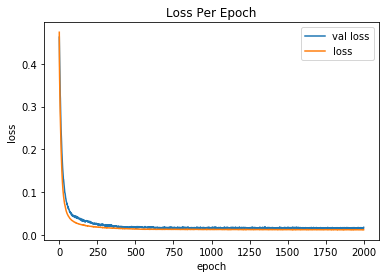

In [16]:
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
#plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses) #plt.subplot(122)

plt.legend(["val loss", "loss"])
plt.show()

from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(metric)) * (len(losses) // len(metric))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = - 
minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [17]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [18]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [19]:
model_dir = '../../../models/'
models = os.listdir(model_dir)
models

['test',
 'region_FB15k_20191023-1742_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_bs8192',
 'FB15k-237_region_20191028_1118_dim50_full_rad1_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs2000_esmetric-custom_vs8192',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs1000_esmetric-custom_final',
 'FB15k237_TransE_20191024-1716_dim50_loss-MRL_lr001_margin1_epochs1000_bs8192_esmetric-custom',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-custom_final',
 'region_FB15k_20191023_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom',
 'FB15k237_region_20191024-1716_dim50_sphere_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom_bs8192',
 '.directory',
 'TransE_FB15k_20191023_dim50_lr001_margi

In [20]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = '../../../data/fb15k/train.tsv'
    config['test_set_path'] = '../../../data/fb15k/valid.tsv'
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14951
    config[pkc.NUM_RELATIONS] = 1345
    config[pkc.PREFERRED_DEVICE] = 'gpu'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [21]:
pipeline = Pipeline(config)
config[pkc.PREFERRED_DEVICE] = pipeline.device_name
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.region.Region

In [22]:
metrics =  [pkc.MEAN_RANK, pkc.HITS_AT_K] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]

#### Evaluate RelationalTriple

In [23]:
val_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics= metrics,
    filter_neg_triples=True,
    threshold_search=True,
    single_threshold=True
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 605.90s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.19931160796012026, hits_at_k={1: 0.10502, 3: 0.22121, 5: 0.29043, 10: 0.39416}, precision=None, recall=None, accuracy=None, fscore=None)


In [40]:
val_results_ = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics= ['prediction'],
    threshold_search=True,
    single_threshold=True
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.66s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=None, recall=None, accuracy=None, fscore=None)


In [41]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= ['prediction'],
    threshold_search=False
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.53 achieved on threshold: 0.01
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.54s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=0.7204518430439952, recall=0.10257148177616766, accuracy=0.5313145508110122, fscore=0.1795764733776915)


In [42]:
model.relation_thresholds.mean()

0.0069137481507605125

In [43]:
json.dump(model.relation_thresholds[0], open(os.path.join(input_directory, 'threshold.json'),"w"))

In [28]:
val_results_ = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics= ['prediction'],
    threshold_search=True,
    single_threshold=False
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 6.98s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=None, recall=None, accuracy=None, fscore=None)


In [29]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= ['prediction'],
    threshold_search=False
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.96 achieved on threshold: 0.02
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.55s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=0.9337657518111557, recall=0.9797023920367016, accuracy=0.9550980325759372, fscore=0.9561826713369903)


In [30]:
model.relation_thresholds.mean()

0.02329402726154309

In [31]:
json.dump(model.relation_thresholds.tolist(), open(os.path.join(input_directory, 'mult_thresholds.json'),"w"))

In [32]:
val_results['eval_summary']

{'mean_rank': 0.19931160796012026,
 'hits@k': {1: 0.10502, 3: 0.22121, 5: 0.29043, 10: 0.39416},
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

In [33]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

DEBUG:pykeen.utilities.pipeline:map negative test
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy 0.96 achieved on threshold: 0.02
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 715.78s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.1985944325589717, hits_at_k={1: 0.10454368471838973, 3: 0.22005721927849536, 5: 0.2890843222562679, 10: 0.3921890606219634}, precision=0.9337657518111557, recall=0.9797023920367016, accuracy=0.9550980325759372, fscore=0.9561826713369903)


In [34]:
test_results['eval_summary']

{'mean_rank': 0.1985944325589717,
 'hits@k': {1: 0.10454368471838973,
  3: 0.22005721927849536,
  5: 0.2890843222562679,
  10: 0.3921890606219634},
 'precision': 0.9337657518111557,
 'recall': 0.9797023920367016,
 'accuracy': 0.9550980325759372,
 'f1_score': 0.9561826713369903}

In [35]:
json.dump(val_results['eval_summary'], open(os.path.join(input_directory, 'valid_evaluation_summary.json'),"w"))

In [36]:
json.dump(test_results['eval_summary'], open(os.path.join(input_directory, 'evaluation_summary.json'),"w"))

## Load results

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [38]:
%matplotlib inline

In [39]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

FileNotFoundError: [Errno 2] No such file or directory: 'D:/uni/master/models/'

In [ ]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-prediction'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [ ]:
results.keys()

In [ ]:
results['final_configuration']

In [ ]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
results['eval_summary']

### 